# Lab 2
Minghao LI A53323531
Download data.csv file in this repo. It contains basic data for all materials in the Materials Project.




# Q1 - Exploratory data analysis (10 points)
Load the data.csv in variable orig_data using pandas.read_csv with na_filter=False option, and perform the following analysis.

1. How many elements are there in this data set?
2. What is the maximum number of elements (max_el) in a single structure?
3. Plot a barplot of the number of materials having 1, 2, 3, ... max_els. Use a log scale for the y-axis.
4. Count the number of materials where each element is present. Sort this count and answer the following questions. What are the 10 most common elements in this data set? and what are the 10 least common elements in this data set?
* Hint: When dealing with formula, you may use pymatgen.Composition to speed up the process. For example, the following code snippet shows the use of Composition to process formula. For more usage, you may visit https://matgenb.materialsvirtuallab.org/2013/01/01/Basic-functionality.html

In [2]:
# Q1.1
import pandas as pd
from pymatgen import Composition, Element

data = pd.read_csv('data.csv', na_filter=False)
dt =pd.DataFrame(data)
len(dt)
dt

task_id     formula  formation_energy_per_atom  e_above_hull  \
0       mp-1007923       CrNi3                  -0.016354      0.000802   
1       mp-1008754       TbHg2                  -0.069428      0.329909   
2       mp-1016886       MgVO3                  -2.241438      0.545977   
3       mp-1018902      PrSbPt                  -1.111238      0.000000   
4       mp-1020595      Rb8PO3                  -0.772860      0.491666   
...            ...         ...                        ...           ...   
124510    mvc-9995   Zn(MoO2)2                  -1.774105      0.170001   
124511    mvc-9996      MgV2O4                  -2.669536      0.053871   
124512    mvc-9997   Ca(CoO2)2                  -1.777514      0.161485   
124513    mvc-9998   CaLaCrWO6                  -2.890804      0.061516   
124514    mvc-9999  CaLaCrSnO6                  -2.921317      0.033726   

        band_gap  has_bandstructure  
0         0.0000              False  
1         0.0000               True  
2         0.0000               True  
3         0.0000               True  
4         0.0000               True  
...          ...                ...  
124510    0.6809               True  
124511    1.4898               True  
124512    0.0000               True  
124513    2.1305               True  
124514    2.3708               True  

[124515 rows x 6 columns]

👆 Q1.1 Answer \
**124515** elements are in the data set.

In [3]:
# Q1.2
dt['comp'] = [Composition(i) for i in dt['formula']]
dt['elements'] = [i.elements for i in dt['comp']]
 
dt
# # dt['formula']
# # Composition(0)

# materialelementlist = []
# i = -1
# for item in dt['formula']:
#     i = i+1
#     try:
#         comp = Composition(item)
#         materialelementlist.append(comp.elements)
#     except:
#         print(item)
#         print(i)


task_id     formula  formation_energy_per_atom  e_above_hull  \
0       mp-1007923       CrNi3                  -0.016354      0.000802   
1       mp-1008754       TbHg2                  -0.069428      0.329909   
2       mp-1016886       MgVO3                  -2.241438      0.545977   
3       mp-1018902      PrSbPt                  -1.111238      0.000000   
4       mp-1020595      Rb8PO3                  -0.772860      0.491666   
...            ...         ...                        ...           ...   
124510    mvc-9995   Zn(MoO2)2                  -1.774105      0.170001   
124511    mvc-9996      MgV2O4                  -2.669536      0.053871   
124512    mvc-9997   Ca(CoO2)2                  -1.777514      0.161485   
124513    mvc-9998   CaLaCrWO6                  -2.890804      0.061516   
124514    mvc-9999  CaLaCrSnO6                  -2.921317      0.033726   

        band_gap  has_bandstructure                 comp             elements  
0         0.0000              False             (Cr, Ni)             [Cr, Ni]  
1         0.0000               True             (Tb, Hg)             [Tb, Hg]  
2         0.0000               True           (Mg, V, O)           [Mg, V, O]  
3         0.0000               True         (Pr, Sb, Pt)         [Pr, Sb, Pt]  
4         0.0000               True           (Rb, P, O)           [Rb, P, O]  
...          ...                ...                  ...                  ...  
124510    0.6809               True          (Zn, Mo, O)          [Zn, Mo, O]  
124511    1.4898               True           (Mg, V, O)           [Mg, V, O]  
124512    0.0000               True          (Ca, Co, O)          [Ca, Co, O]  
124513    2.1305               True   (Ca, La, Cr, W, O)   [Ca, La, Cr, W, O]  
124514    2.3708               True  (Ca, La, Cr, Sn, O)  [Ca, La, Cr, Sn, O]  

[124515 rows x 8 columns]

In [4]:
# Q1.2
type(dt['elements'][1])

list

In [5]:
# Q1.2
lenlist = [len(elem) for elem in dt['elements'] ]
max_el = max(lenlist)
print('The maximun number of element in a single crystal is %.0f' % max_el)

The maximun number of element in a single crystal is 9


👆 Q1.2 Answer \
The maximun number of element in a single crystal is 9

In [6]:
# Q1.3
import numpy as np

numofelementlist = list(set(lenlist)) # x: the number of the elements list 

countnumofelementlist = []
for lenth in numofelementlist:
    countnumofelementlist.append(lenlist.count(lenth))

logcountnumofelementlist = list(np.log(countnumofelementlist)) # y: the log of the counts of the number of the elements
logcountnumofelementlist 


[6.56244409369372,
 9.863446502998944,
 10.971417241071656,
 10.446973958541667,
 9.227885551191932,
 7.381501894506707,
 5.10594547390058,
 2.70805020110221,
 0.6931471805599453]

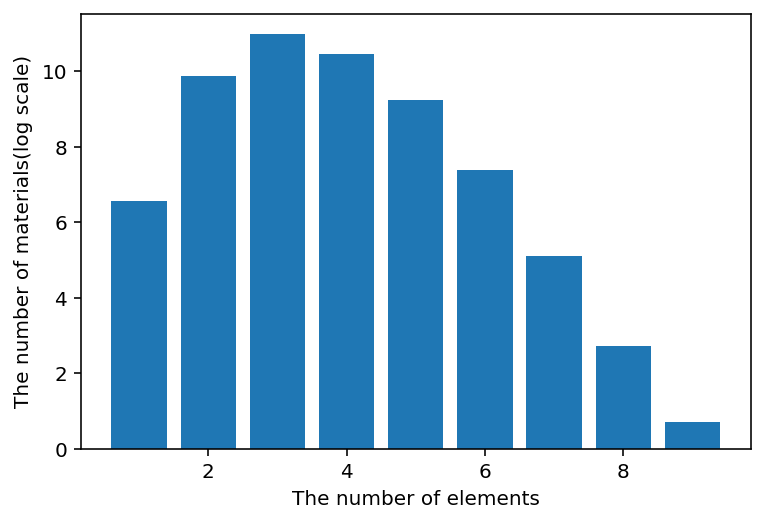

In [7]:
# Q1.3

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format ='retina'

fig = plt.figure()
plt.bar(numofelementlist, logcountnumofelementlist)
plt.xlabel("The number of elements") 
plt.ylabel("The number of materials(log scale)") 

plt.show()

👆 Q1.3 Answer 

In [8]:
# Q1.4

allelement = [j for i in dt['elements'] for j in i]
allelement

[Element Cr,
 Element Ni,
 Element Tb,
 Element Hg,
 Element Mg,
 Element V,
 Element O,
 Element Pr,
 Element Sb,
 Element Pt,
 Element Rb,
 Element P,
 Element O,
 Element Zn,
 Element As,
 Element Pt,
 Element Te,
 Element Mo,
 Element W,
 Element Mo,
 Element W,
 Element Se,
 Element S,
 Element Mo,
 Element W,
 Element Se,
 Element S,
 Element Mg,
 Element Ni,
 Element Sn,
 Element Te,
 Element Mo,
 Element W,
 Element Se,
 Element Te,
 Element W,
 Element Se,
 Element Sr,
 Element Ru,
 Element N,
 Element K,
 Element Mg,
 Element Ga,
 Element O,
 Element Mg,
 Element Al,
 Element Cr,
 Element O,
 Element Te,
 Element Mo,
 Element W,
 Element Se,
 Element Hf,
 Element Mg,
 Element Cd,
 Element O,
 Element Mg,
 Element Ni,
 Element Bi,
 Element O,
 Element U,
 Element Cs,
 Element S,
 Element O,
 Element Sc,
 Element F,
 Element Tb,
 Element Ni,
 Element Sn,
 Element V,
 Element Au,
 Element Mg,
 Element Si,
 Element Mg,
 Element Si,
 Element Mg,
 Element Si,
 Element Mg,
 Element 

In [9]:
# Q1.4

oddelement = list(set(allelement)) # the type of elements
oddelement

[Element H,
 Element He,
 Element Li,
 Element Be,
 Element B,
 Element C,
 Element N,
 Element O,
 Element F,
 Element Ne,
 Element Na,
 Element Mg,
 Element Al,
 Element Si,
 Element P,
 Element S,
 Element Cl,
 Element Ar,
 Element K,
 Element Ca,
 Element Sc,
 Element Ti,
 Element V,
 Element Cr,
 Element Mn,
 Element Fe,
 Element Co,
 Element Ni,
 Element Cu,
 Element Zn,
 Element Ga,
 Element Ge,
 Element As,
 Element Se,
 Element Br,
 Element Kr,
 Element Rb,
 Element Sr,
 Element Y,
 Element Zr,
 Element Nb,
 Element Mo,
 Element Tc,
 Element Ru,
 Element Rh,
 Element Pd,
 Element Ag,
 Element Cd,
 Element In,
 Element Sn,
 Element Sb,
 Element Te,
 Element I,
 Element Xe,
 Element Cs,
 Element Ba,
 Element La,
 Element Ce,
 Element Pr,
 Element Nd,
 Element Pm,
 Element Sm,
 Element Eu,
 Element Gd,
 Element Tb,
 Element Dy,
 Element Ho,
 Element Er,
 Element Tm,
 Element Yb,
 Element Lu,
 Element Hf,
 Element Ta,
 Element W,
 Element Re,
 Element Os,
 Element Ir,
 Element Pt,

In [10]:
# Q1.4
elementdict = {}
for material in dt['elements']:
    for element in oddelement:
        if element in material: 
            elementdict[element] = elementdict.get(element, 0) +1
elementdict

{Element Cr: 5368,
 Element Ni: 6767,
 Element Tb: 1741,
 Element Hg: 2127,
 Element O: 60428,
 Element Mg: 8711,
 Element V: 7276,
 Element Sb: 4630,
 Element Pr: 2276,
 Element Pt: 2224,
 Element P: 13321,
 Element Rb: 3814,
 Element Zn: 5235,
 Element As: 3425,
 Element Mo: 4226,
 Element Te: 4167,
 Element W: 3683,
 Element S: 10516,
 Element Se: 5500,
 Element Sn: 4722,
 Element N: 9723,
 Element Sr: 5117,
 Element Ru: 2145,
 Element K: 6398,
 Element Ga: 4024,
 Element Al: 6446,
 Element Cd: 2880,
 Element Hf: 1642,
 Element Bi: 3782,
 Element U: 2061,
 Element Cs: 3549,
 Element F: 9606,
 Element Sc: 2060,
 Element Au: 2343,
 Element Si: 8940,
 Element Co: 8612,
 Element Cu: 7999,
 Element Ba: 6092,
 Element Na: 7296,
 Element Ta: 2384,
 Element Pd: 2755,
 Element Tl: 2632,
 Element Ge: 4482,
 Element Ce: 2650,
 Element Nd: 2574,
 Element H: 8067,
 Element Br: 2691,
 Element Li: 18580,
 Element Sm: 2335,
 Element Zr: 2722,
 Element Y: 3814,
 Element Ho: 1886,
 Element Rh: 2298,


In [11]:
# Q1.4
leastcommonlist = sorted(elementdict.items(), key = lambda item: item[1])
leastcommonlist[0:10]

[(Element Ne, 1),
 (Element Ar, 2),
 (Element He, 8),
 (Element Kr, 15),
 (Element Xe, 147),
 (Element Pa, 253),
 (Element Ac, 297),
 (Element Np, 340),
 (Element Pu, 388),
 (Element Pm, 515)]

👆 Q1.4 Answer \
the 10 least common elements in this data set

In [12]:
# Q1.4
mostcommonlist = sorted(elementdict.items(), key = lambda item: item[1], reverse = True)
mostcommonlist[0:10]

[(Element O, 60428),
 (Element Li, 18580),
 (Element P, 13321),
 (Element Mn, 11233),
 (Element S, 10516),
 (Element Fe, 10109),
 (Element N, 9723),
 (Element F, 9606),
 (Element Si, 8940),
 (Element Mg, 8711)]

 👆 Q1.4 Answer \
the 10 most common elements in this data se

# Q2
Q2 - Data cleaning and feature computations (20 points)
About 80% of the effort in ML modelling is in data processing. The goal is to develop ML models to **predict the formation energy per atom and band gap of the material from the formula**. To do that, we **will first convert the formula to numeric vectors (descriptors) for model inputs**.

1. Filter out materials that contain noble gas elements and save it in variable `data`. How many materials are left? Store this number in the variable n.
2. Load the element property data file element_properties.csv in variable element_data using pandas by setting index_col=0 in pandas.read_csv function. How many NaN (Not a Number) are there in each column?
3. Compute the mean values for each column, ignoring the NaNs. For each column, fill the NaN with the mean value of that column. This is a common data imputation technique.
4. Compute the composition-averaged AtomicRadius for all materials and store the results in variable atomic_radius. For example, averaged AtomicRadius for Li2O can be computed as (2 * 1.45 + 0.6) / 3, where 1.45 is the AtomicRadius for Li and 0.6 is the AtomicRadius for O.
5. Compute the composition-averaged properties for all properties in element_data and for all materials. Store the results in the variable average_properties. average_properties should have a dimension of (n, 16) where n is the number of materials and 16 is the number of properties.
6. Similar to the previous computations of average properties, compute the maximum properties and minimum properties for all properties and all materials, and store them in variables max_properties and min_properties respectively. Both variables should have dimension (n, 16).
7. Concatenate average_properties, max_properties and min_properties, and store the result in variable design_matrix with dimension (n, 48).

In [13]:
# Q2.1
# FUNCTION if any noble gas in materials element

def AnyNobleGas(iterable):
    for element in iterable:
        if element.is_noble_gas:
            return True
    return False

In [14]:
# Q2.1 
# position of mateiales that filtered out matierlas that contain noble gas elements
# count the number of materials: n

n = 0
i = -1
ilist = []
for element in dt['elements']:
    i = i+1
    if AnyNobleGas(element):
        continue
    else:
        n = n + 1
        ilist.append(i)
n

124342

In [15]:
# Q2.1
# get the data from the postion of materials aquired in last step with '.iloc()'

data = dt.iloc[ilist]
data

task_id     formula  formation_energy_per_atom  e_above_hull  \
0       mp-1007923       CrNi3                  -0.016354      0.000802   
1       mp-1008754       TbHg2                  -0.069428      0.329909   
2       mp-1016886       MgVO3                  -2.241438      0.545977   
3       mp-1018902      PrSbPt                  -1.111238      0.000000   
4       mp-1020595      Rb8PO3                  -0.772860      0.491666   
...            ...         ...                        ...           ...   
124510    mvc-9995   Zn(MoO2)2                  -1.774105      0.170001   
124511    mvc-9996      MgV2O4                  -2.669536      0.053871   
124512    mvc-9997   Ca(CoO2)2                  -1.777514      0.161485   
124513    mvc-9998   CaLaCrWO6                  -2.890804      0.061516   
124514    mvc-9999  CaLaCrSnO6                  -2.921317      0.033726   

        band_gap  has_bandstructure                 comp             elements  
0         0.0000              False             (Cr, Ni)             [Cr, Ni]  
1         0.0000               True             (Tb, Hg)             [Tb, Hg]  
2         0.0000               True           (Mg, V, O)           [Mg, V, O]  
3         0.0000               True         (Pr, Sb, Pt)         [Pr, Sb, Pt]  
4         0.0000               True           (Rb, P, O)           [Rb, P, O]  
...          ...                ...                  ...                  ...  
124510    0.6809               True          (Zn, Mo, O)          [Zn, Mo, O]  
124511    1.4898               True           (Mg, V, O)           [Mg, V, O]  
124512    0.0000               True          (Ca, Co, O)          [Ca, Co, O]  
124513    2.1305               True   (Ca, La, Cr, W, O)   [Ca, La, Cr, W, O]  
124514    2.3708               True  (Ca, La, Cr, Sn, O)  [Ca, La, Cr, Sn, O]  

[124342 rows x 8 columns]

👆 Q2.1 Answer
filted data and n

In [16]:
# 2.2
# read the data from element_data.csv and set the fisrt column(element name) as index: 'index_col=0'

element_data = pd.read_csv('element_properties.csv', index_col=0)
element_data.head()

AtomicRadius  AtomicVolume  AtomicWeight  BulkModulus  BoilingT  Column  \
H           0.25  18618.051941      1.007940          NaN     20.13     1.0   
He           NaN  37236.035563      4.002602          NaN      4.07    18.0   
Li          1.45     21.544058      6.941000         11.0   1615.00     1.0   
Be          1.05      8.098176      9.012182        130.0   2743.00     2.0   
B           0.85      7.297767     10.811000        320.0   4273.00    13.0   

    CovalentRadius    Density  ElectronAffinity  Electronegativity  \
H             31.0     0.0899              72.8               2.20   
He            28.0     0.1785               0.0                NaN   
Li           128.0   535.0000              59.6               0.98   
Be            96.0  1848.0000               0.0               1.57   
B             84.0  2460.0000              26.7               2.04   

    FirstIonizationEnergy  HeatCapacityMass  Row   phi  \
H               13.598443            14.304  1.0  5.20   
He              24.587387             5.130  1.0   NaN   
Li               5.391719             3.582  2.0  2.85   
Be               9.322700             1.825  2.0  5.05   
B                8.298020             1.026  2.0  5.30   

    SecondIonizationEnergy  ShearModulus  
H                      NaN           NaN  
He                54.41776           NaN  
Li                75.64000           4.2  
Be                18.21114         132.0  
B                 25.15480           NaN

In [17]:
# Q2.2 
# acquire the name list of columns

element_data.columns

Index(['AtomicRadius', 'AtomicVolume', 'AtomicWeight', 'BulkModulus',
       'BoilingT', 'Column', 'CovalentRadius', 'Density', 'ElectronAffinity',
       'Electronegativity', 'FirstIonizationEnergy', 'HeatCapacityMass', 'Row',
       'phi', 'SecondIonizationEnergy', 'ShearModulus'],
      dtype='object')

In [18]:
# Q2.2
# creat a dict to store the number of NAN in each column

dictnan = {}
for i in element_data.columns:
    dictnan[i] = element_data[i].isna().sum() 
print(dictnan)

{'AtomicRadius': 7, 'AtomicVolume': 2, 'AtomicWeight': 0, 'BulkModulus': 26, 'BoilingT': 2, 'Column': 0, 'CovalentRadius': 0, 'Density': 2, 'ElectronAffinity': 9, 'Electronegativity': 4, 'FirstIonizationEnergy': 1, 'HeatCapacityMass': 10, 'Row': 0, 'phi': 22, 'SecondIonizationEnergy': 12, 'ShearModulus': 34}


👆 Q2.2 Answer \
filted data and n

In [19]:
# Q2.3
# compute the mean while ignore the NANs in the column
# just a validation for next step

meandict ={}
for item in element_data.columns:
    meandict[item] = np.nanmean(element_data[item])
    
print(meandict)
    

{'AtomicRadius': 1.5006818181818182, 'AtomicVolume': 3426.442121318221, 'AtomicWeight': 116.15389557873684, 'BulkModulus': 90.79420289855071, 'BoilingT': 2549.8580645161287, 'Column': 8.31578947368421, 'CovalentRadius': 151.81052631578947, 'Density': 7489.235724731183, 'ElectronAffinity': 76.16220930232558, 'Electronegativity': 1.7470329670329672, 'FirstIonizationEnergy': 8.094711130851064, 'HeatCapacityMass': 0.6354470588235294, 'Row': 4.831578947368421, 'phi': 4.034246575342466, 'SecondIonizationEnergy': 18.947504216867472, 'ShearModulus': 47.36229508196722}


In [20]:
# Q2.3
# compute the mean value for each column
# fill the NAN with the mean value

element_data_replaced  = element_data.fillna(element_data.mean())
element_data_replaced

AtomicRadius  AtomicVolume  AtomicWeight  BulkModulus  BoilingT  Column  \
H       0.250000  18618.051941      1.007940    90.794203     20.13     1.0   
He      1.500682  37236.035563      4.002602    90.794203      4.07    18.0   
Li      1.450000     21.544058      6.941000    11.000000   1615.00     1.0   
Be      1.050000      8.098176      9.012182   130.000000   2743.00     2.0   
B       0.850000      7.297767     10.811000   320.000000   4273.00    13.0   
..           ...           ...           ...          ...       ...     ...   
Pa      1.800000     24.961161    231.035860    90.794203   4273.00     3.0   
U       1.750000     20.748847    238.028910   100.000000   4200.00     3.0   
Np      1.750000     19.244839    237.000000    90.794203   4273.00     3.0   
Pu      1.750000     20.447164    244.000000    90.794203   3503.00     3.0   
Am      1.750000     29.518685    243.000000    90.794203   2284.00     3.0   

    CovalentRadius     Density  ElectronAffinity  Electronegativity  \
H             31.0      0.0899         72.800000           2.200000   
He            28.0      0.1785          0.000000           1.747033   
Li           128.0    535.0000         59.600000           0.980000   
Be            96.0   1848.0000          0.000000           1.570000   
B             84.0   2460.0000         26.700000           2.040000   
..             ...         ...               ...                ...   
Pa           200.0  15370.0000         76.162209           1.500000   
U            196.0  19050.0000         76.162209           1.380000   
Np           190.0  20450.0000         76.162209           1.360000   
Pu           187.0  19816.0000         76.162209           1.280000   
Am           180.0  13670.0000         76.162209           1.300000   

    FirstIonizationEnergy  HeatCapacityMass  Row       phi  \
H               13.598443         14.304000  1.0  5.200000   
He              24.587387          5.130000  1.0  4.034247   
Li               5.391719          3.582000  2.0  2.850000   
Be               9.322700          1.825000  2.0  5.050000   
B                8.298020          1.026000  2.0  5.300000   
..                    ...               ...  ...       ...   
Pa               5.890000          0.635447  7.0  4.034247   
U                6.194100          0.116000  7.0  3.900000   
Np               6.265700          0.635447  7.0  4.034247   
Pu               6.026000          0.635447  7.0  3.800000   
Am               5.973800          0.635447  7.0  4.034247   

    SecondIonizationEnergy  ShearModulus  
H                18.947504     47.362295  
He               54.417760     47.362295  
Li               75.640000      4.200000  
Be               18.211140    132.000000  
B                25.154800     47.362295  
..                     ...           ...  
Pa               18.947504     47.362295  
U                10.600000    111.000000  
Np               18.947504     47.362295  
Pu               11.200000     43.000000  
Am               18.947504     47.362295  

[95 rows x 16 columns]

In [21]:
# Q2.3
# validation
mean_radius = element_data_replaced['AtomicRadius'].mean()
mean_radius

1.5006818181818182

👆 Q2.3 Answer


In [22]:
# Q2.4

data['compdict'] = [comp.to_data_dict['unit_cell_composition'] for comp in data['comp']]
data

/opt/anaconda3/envs/nano281/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


task_id     formula  formation_energy_per_atom  e_above_hull  \
0       mp-1007923       CrNi3                  -0.016354      0.000802   
1       mp-1008754       TbHg2                  -0.069428      0.329909   
2       mp-1016886       MgVO3                  -2.241438      0.545977   
3       mp-1018902      PrSbPt                  -1.111238      0.000000   
4       mp-1020595      Rb8PO3                  -0.772860      0.491666   
...            ...         ...                        ...           ...   
124510    mvc-9995   Zn(MoO2)2                  -1.774105      0.170001   
124511    mvc-9996      MgV2O4                  -2.669536      0.053871   
124512    mvc-9997   Ca(CoO2)2                  -1.777514      0.161485   
124513    mvc-9998   CaLaCrWO6                  -2.890804      0.061516   
124514    mvc-9999  CaLaCrSnO6                  -2.921317      0.033726   

        band_gap  has_bandstructure                 comp             elements  \
0         0.0000              False             (Cr, Ni)             [Cr, Ni]   
1         0.0000               True             (Tb, Hg)             [Tb, Hg]   
2         0.0000               True           (Mg, V, O)           [Mg, V, O]   
3         0.0000               True         (Pr, Sb, Pt)         [Pr, Sb, Pt]   
4         0.0000               True           (Rb, P, O)           [Rb, P, O]   
...          ...                ...                  ...                  ...   
124510    0.6809               True          (Zn, Mo, O)          [Zn, Mo, O]   
124511    1.4898               True           (Mg, V, O)           [Mg, V, O]   
124512    0.0000               True          (Ca, Co, O)          [Ca, Co, O]   
124513    2.1305               True   (Ca, La, Cr, W, O)   [Ca, La, Cr, W, O]   
124514    2.3708               True  (Ca, La, Cr, Sn, O)  [Ca, La, Cr, Sn, O]   

                                                 compdict  
0                                  {'Cr': 1.0, 'Ni': 3.0}  
1                                  {'Tb': 1.0, 'Hg': 2.0}  
2                         {'Mg': 1.0, 'V': 1.0, 'O': 3.0}  
3                       {'Pr': 1.0, 'Sb': 1.0, 'Pt': 1.0}  
4                         {'Rb': 8.0, 'P': 1.0, 'O': 3.0}  
...                                                   ...  
124510                   {'Zn': 1.0, 'Mo': 2.0, 'O': 4.0}  
124511                    {'Mg': 1.0, 'V': 2.0, 'O': 4.0}  
124512                   {'Ca': 1.0, 'Co': 2.0, 'O': 4.0}  
124513  {'Ca': 1.0, 'La': 1.0, 'Cr': 1.0, 'W': 1.0, 'O...  
124514  {'Ca': 1.0, 'La': 1.0, 'Cr': 1.0, 'Sn': 1.0, '...  

[124342 rows x 9 columns]

In [23]:
average_properties = pd.DataFrame()
type(average_properties)

pandas.core.frame.DataFrame

In [24]:
# Q2.4
# FUNCTION compute the compostion averaged AtomicRadius for one materials
# input: unit_cell_composition dictionary
# output: atomic_radius(float)

def AtomicRadius(compdict):
    total_radius = 0
    total_num = 0
    for atomic, num in compdict.items():
        total_radius = element_data_replaced['AtomicRadius'][atomic] * num + total_radius
        total_num = total_num +num
    atomic_radius = total_radius / total_num 
    return atomic_radius
        

In [25]:
# Q2.5
# FUNCTION compute the compostion averaged AtomicRadius for one materials
# input: unit_cell_composition dictionary
# output: average_properties(float) for 16 properites

def AverageProperties(compdict):
    average_properties = {}
    for properties in element_data_replaced.columns:
        total_properties = 0
        total_num = 0
        for atomic, num in compdict.items():
            total_properties = element_data_replaced[properties][atomic] * num + total_properties
            total_num = total_num +num
        avg_properties = total_properties / total_num
        average_properties[properties] = avg_properties
    return average_properties
        
        
        


In [26]:
# Q2.6
# FUNCTION compute the compostion averaged AtomicRadius for one materials
# input: unit_cell_composition dictionary
# output: max_properties(float) for 16 properites

def MaxProperties(compdict):
    max_properties = {}
    for properties in element_data_replaced.columns:
        propertieslist = []
        for atomic in compdict:
            propertieslist.append(element_data_replaced[properties][atomic])
        max_properties[properties] = max(propertieslist)
    return max_properties

In [27]:
# Q2.6
# FUNCTION compute the compostion averaged AtomicRadius for one materials
# input: unit_cell_composition dictionary
# output: min_properties(float) for 16 properites

def MinProperties(compdict):
    min_properties = {}
    for properties in element_data_replaced.columns:
        propertieslist = []
        for atomic in compdict:
            propertieslist.append(element_data_replaced[properties][atomic])
        min_properties[properties] = min(propertieslist)
    return min_properties

👆 3 Functions for 2.4 2.5 2.6 respectively

In [28]:
from pymatgen import Composition
comp = Composition('Al2O3')
print(comp.elements)  # this will give you the elements
compdict = comp.to_data_dict['unit_cell_composition'] # this will give you the elementstr-stoichiometry dictionary.
compdict

[Element Al, Element O]


defaultdict(float, {'Al': 2.0, 'O': 3.0})

In [29]:
MinProperties(compdict)

{'AtomicRadius': 0.6,
 'AtomicVolume': 16.5944245175099,
 'AtomicWeight': 15.9994,
 'BulkModulus': 76.0,
 'BoilingT': 90.1,
 'Column': 13.0,
 'CovalentRadius': 66.0,
 'Density': 1.429,
 'ElectronAffinity': 42.5,
 'Electronegativity': 1.61,
 'FirstIonizationEnergy': 5.985768,
 'HeatCapacityMass': 0.897,
 'Row': 2.0,
 'phi': 4.034246575342465,
 'SecondIonizationEnergy': 18.82855,
 'ShearModulus': 26.0}

In [30]:
# Q2.4
# compute the atomicradius with the function 'AtomicRadius'
# store the outcome in data['atomic_radius']
data['atomic_radius'] = [AtomicRadius(compdict) for compdict in data['compdict']]
data.head()

/opt/anaconda3/envs/nano281/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


task_id formula  formation_energy_per_atom  e_above_hull  band_gap  \
0  mp-1007923   CrNi3                  -0.016354      0.000802       0.0   
1  mp-1008754   TbHg2                  -0.069428      0.329909       0.0   
2  mp-1016886   MgVO3                  -2.241438      0.545977       0.0   
3  mp-1018902  PrSbPt                  -1.111238      0.000000       0.0   
4  mp-1020595  Rb8PO3                  -0.772860      0.491666       0.0   

   has_bandstructure          comp      elements  \
0              False      (Cr, Ni)      [Cr, Ni]   
1               True      (Tb, Hg)      [Tb, Hg]   
2               True    (Mg, V, O)    [Mg, V, O]   
3               True  (Pr, Sb, Pt)  [Pr, Sb, Pt]   
4               True    (Rb, P, O)    [Rb, P, O]   

                            compdict  atomic_radius  
0             {'Cr': 1.0, 'Ni': 3.0}       1.362500  
1             {'Tb': 1.0, 'Hg': 2.0}       1.583333  
2    {'Mg': 1.0, 'V': 1.0, 'O': 3.0}       0.930000  
3  {'Pr': 1.0, 'Sb': 1.0, 'Pt': 1.0}       1.550000  
4    {'Rb': 8.0, 'P': 1.0, 'O': 3.0}       1.800000

In [31]:
# Q2.4
# the data of 'atomic_radius'
data['atomic_radius']

0         1.362500
1         1.583333
2         0.930000
3         1.550000
4         1.800000
            ...   
124510    0.950000
124511    0.942857
124512    0.985714
124513    1.010000
124514    1.020000
Name: atomic_radius, Length: 124342, dtype: float64

In [32]:
# Q2.5
# compute the average of all 16 properties with 'AverageProperties'
# store the data in dataframe average_properties

average_properties = pd.DataFrame()
for compdict in data['compdict']:
    average_properties = average_properties.append(AverageProperties(compdict), ignore_index=True)
average_properties

AtomicRadius  AtomicVolume  AtomicWeight     BoilingT  BulkModulus  \
0           1.362500     11.229198     57.019075  3125.500000   175.000000   
1           1.583333     27.110992    186.701783  1587.486667    29.566667   
2           0.930000  11162.731738     24.648940  1062.660000    95.476522   
3           1.550000     26.930354    152.583883  3173.666667   100.333333   
4           1.800000   4712.161103     63.559530   709.316667    25.281884   
...              ...           ...           ...          ...          ...   
124337      0.950000  10630.713730     45.899657  1623.485714   127.596687   
124338      0.942857  10631.385822     27.169371  1297.628571   104.025259   
124339      0.985714  10633.388225     31.705999  1216.771429   105.739545   
124340      1.010000  11166.160250     51.081597  1480.660000   105.976522   
124341      1.020000  11167.271056     44.568597  1185.360000    80.776522   

           Column  CovalentRadius       Density  ElectronAffinity  \
0        9.000000      127.750000   8466.000000        100.075000   
1        9.000000      152.666667  11762.333333         16.666667   
2       11.000000       98.400000   1570.457400         94.720000   
3        9.333333      159.333333  11475.666667        119.500000   
4        5.916667      172.083333   1173.607250         72.516667   
...           ...             ...           ...               ...   
124337  12.571429       99.142857   3957.959429        101.114286   
124338  10.857143      101.571429   1994.816571         95.028571   
124339  12.000000       98.857143   2765.102286         99.110000   
124340  11.300000      108.000000   3409.457400        103.927000   
124341  12.100000      105.700000   2215.457400        106.797000   

        Electronegativity  FirstIonizationEnergy  HeatCapacityMass       Row  \
0                1.847500               7.421477          0.445250  4.000000   
1                1.736667               8.912933          0.154000  6.000000   
2                2.652000              11.049315          0.853200  2.600000   
3                1.820000               7.680063          0.177667  5.666667   
4                1.589167               7.063155          0.535583  4.083333   
...                   ...                    ...               ...       ...   
124337           2.818571              11.150180          0.651714  3.142857   
124338           2.618571              10.801545          0.810429  2.714286   
124339           2.645714              10.906769          0.737286  2.857143   
124340           2.676000              10.802890          0.693100  3.200000   
124341           2.636000              10.750879          0.702600  3.100000   

        SecondIonizationEnergy  ShearModulus       phi  
0                    17.748055     85.750000  5.062500  
1                    16.344533     38.908197  3.870000  
2                    27.003314     41.217377  3.960548  
3                    15.247667     32.000000  4.413333  
4                    28.620733     47.362295  2.871062  
...                        ...           ...       ...  
124337               27.252684     38.921311  4.219569  
124338               26.393667     42.921311  4.012427  
124339               26.646303     49.549883  4.126712  
124340               26.624302     58.157377  3.937548  
124341               26.477522     43.857377  3.872548  

[124342 rows x 16 columns]

👆 Q2.5

In [33]:
# Q2.6
# find the max value of all 16 properties with 'MaxProperties'
# store the data in dataframe 'max_propertiestest'

max_properties = pd.DataFrame()
for compdict in data['compdict']:
    max_properties = max_properties.append(MaxProperties(compdict), ignore_index=True)
max_properties


AtomicRadius  AtomicVolume  AtomicWeight  BoilingT  BulkModulus  \
0               1.40     12.092937     58.693400    3186.0   180.000000   
1               1.75     32.109493    200.590000    3503.0    38.700000   
2               1.50  18592.197166     50.941500    3680.0   160.000000   
3               1.85     35.239176    195.084000    4098.0   230.000000   
4               2.35  18592.197166     85.467800     961.0    90.794203   
...              ...           ...           ...       ...          ...   
124337          1.45  18592.197166     95.960000    4912.0   230.000000   
124338          1.50  18592.197166     50.941500    3680.0   160.000000   
124339          1.80  18592.197166     58.933195    3200.0   180.000000   
124340          1.95  18592.197166    183.840000    5828.0   310.000000   
124341          1.95  18592.197166    138.905470    3737.0   160.000000   

        Column  CovalentRadius  Density  ElectronAffinity  Electronegativity  \
0         10.0           139.0   8908.0             112.0               1.91   
1         12.0           194.0  13534.0              50.0               2.00   
2         16.0           153.0   6110.0             141.0               3.44   
3         15.0           203.0  21090.0             205.3               2.28   
4         16.0           220.0   1823.0             141.0               3.44   
...        ...             ...      ...               ...                ...   
124337    16.0           154.0  10280.0             141.0               3.44   
124338    16.0           153.0   6110.0             141.0               3.44   
124339    16.0           176.0   8900.0             141.0               3.44   
124340    16.0           207.0  19250.0             141.0               3.44   
124341    16.0           207.0   7310.0             141.0               3.44   

        FirstIonizationEnergy  HeatCapacityMass  Row  SecondIonizationEnergy  \
0                     7.63980             0.449  4.0                18.16884   
1                    10.43750             0.182  6.0                18.75680   
2                    13.61805             1.023  4.0                35.12110   
3                     8.95880             0.207  6.0                18.56300   
4                    13.61805             0.918  5.0                35.12110   
...                       ...               ...  ...                     ...   
124337               13.61805             0.918  5.0                35.12110   
124338               13.61805             1.023  4.0                35.12110   
124339               13.61805             0.918  4.0                35.12110   
124340               13.61805             0.918  6.0                35.12110   
124341               13.61805             0.918  6.0                35.12110   

        ShearModulus   phi  
0         115.000000  5.20  
1          47.362295  4.20  
2          47.362295  4.25  
3          61.000000  5.65  
4          47.362295  5.55  
...              ...   ...  
124337     47.362295  4.65  
124338     47.362295  4.25  
124339     75.000000  5.10  
124340    161.000000  4.80  
124341    115.000000  4.65  

[124342 rows x 16 columns]

In [34]:
# Q2.6
# find the min value of all 16 properties with 'MaxProperties'
# store the data in dataframe 'min_propertiestest'

min_properties = pd.DataFrame()
for compdict in data['compdict']:
    min_properties = min_properties.append(MinProperties(compdict), ignore_index=True)
min_properties


AtomicRadius  AtomicVolume  AtomicWeight  BoilingT  BulkModulus  \
0               1.35     10.941284      51.99610   2944.00        160.0   
1               1.50     24.611742     158.92535    629.73         25.0   
2               0.60     13.844898      15.99940     90.10         45.0   
3               1.35     15.360464     121.76000   1860.00         29.0   
4               0.60     28.214122      15.99940     90.10          2.5   
...              ...           ...           ...       ...          ...   
124337          0.60     15.205684      15.99940     90.10         70.0   
124338          0.60     13.844898      15.99940     90.10         45.0   
124339          0.60     10.995861      15.99940     90.10         17.0   
124340          0.60     12.092937      15.99940     90.10         17.0   
124341          0.60     12.092937      15.99940     90.10         17.0   

        Column  CovalentRadius   Density  ElectronAffinity  Electronegativity  \
0          6.0           124.0  7140.000             64.30               1.66   
1          3.0           132.0  8219.000              0.00               1.21   
2          2.0            66.0     1.429              0.00               1.31   
3          3.0           136.0  6640.000             50.00               1.13   
4          1.0            66.0     1.429             46.90               0.82   
...        ...             ...       ...               ...                ...   
124337     6.0            66.0     1.429              0.00               1.65   
124338     2.0            66.0     1.429              0.00               1.31   
124339     2.0            66.0     1.429              2.37               1.00   
124340     2.0            66.0     1.429              2.37               1.00   
124341     2.0            66.0     1.429              2.37               1.00   

        FirstIonizationEnergy  HeatCapacityMass  Row  SecondIonizationEnergy  \
0                    6.766510             0.444  4.0                16.48570   
1                    5.863800             0.140  6.0                11.52000   
2                    6.746190             0.489  2.0                14.61800   
3                    5.473000             0.133  5.0                10.55000   
4                    4.177128             0.363  2.0                19.76950   
...                       ...               ...  ...                     ...   
124337               7.092430             0.251  2.0                16.16000   
124338               6.746190             0.489  2.0                14.61800   
124339               6.113160             0.421  2.0                11.87172   
124340               5.576900             0.132  2.0                11.05900   
124341               5.576900             0.195  2.0                11.05900   

        ShearModulus       phi  
0          76.000000  4.650000  
1          22.000000  3.210000  
2          17.000000  3.450000  
3          15.000000  3.190000  
4          47.362295  2.100000  
...              ...       ...  
124337     20.000000  4.034247  
124338     17.000000  3.450000  
124339      7.400000  2.550000  
124340      7.400000  2.550000  
124341      7.400000  2.550000  

[124342 rows x 16 columns]

👆 Q2.6

In [35]:
# Q2.7
# concatenate 'average_properties', 'max_properties' and 'min_properties'

design_matrix = pd.concat([average_properties, max_properties,min_properties], axis = 1)
design_matrix

AtomicRadius  AtomicVolume  AtomicWeight     BoilingT  BulkModulus  \
0           1.362500     11.229198     57.019075  3125.500000   175.000000   
1           1.583333     27.110992    186.701783  1587.486667    29.566667   
2           0.930000  11162.731738     24.648940  1062.660000    95.476522   
3           1.550000     26.930354    152.583883  3173.666667   100.333333   
4           1.800000   4712.161103     63.559530   709.316667    25.281884   
...              ...           ...           ...          ...          ...   
124337      0.950000  10630.713730     45.899657  1623.485714   127.596687   
124338      0.942857  10631.385822     27.169371  1297.628571   104.025259   
124339      0.985714  10633.388225     31.705999  1216.771429   105.739545   
124340      1.010000  11166.160250     51.081597  1480.660000   105.976522   
124341      1.020000  11167.271056     44.568597  1185.360000    80.776522   

           Column  CovalentRadius       Density  ElectronAffinity  \
0        9.000000      127.750000   8466.000000        100.075000   
1        9.000000      152.666667  11762.333333         16.666667   
2       11.000000       98.400000   1570.457400         94.720000   
3        9.333333      159.333333  11475.666667        119.500000   
4        5.916667      172.083333   1173.607250         72.516667   
...           ...             ...           ...               ...   
124337  12.571429       99.142857   3957.959429        101.114286   
124338  10.857143      101.571429   1994.816571         95.028571   
124339  12.000000       98.857143   2765.102286         99.110000   
124340  11.300000      108.000000   3409.457400        103.927000   
124341  12.100000      105.700000   2215.457400        106.797000   

        Electronegativity  ...  CovalentRadius   Density  ElectronAffinity  \
0                1.847500  ...           124.0  7140.000             64.30   
1                1.736667  ...           132.0  8219.000              0.00   
2                2.652000  ...            66.0     1.429              0.00   
3                1.820000  ...           136.0  6640.000             50.00   
4                1.589167  ...            66.0     1.429             46.90   
...                   ...  ...             ...       ...               ...   
124337           2.818571  ...            66.0     1.429              0.00   
124338           2.618571  ...            66.0     1.429              0.00   
124339           2.645714  ...            66.0     1.429              2.37   
124340           2.676000  ...            66.0     1.429              2.37   
124341           2.636000  ...            66.0     1.429              2.37   

        Electronegativity  FirstIonizationEnergy  HeatCapacityMass  Row  \
0                    1.66               6.766510             0.444  4.0   
1                    1.21               5.863800             0.140  6.0   
2                    1.31               6.746190             0.489  2.0   
3                    1.13               5.473000             0.133  5.0   
4                    0.82               4.177128             0.363  2.0   
...                   ...                    ...               ...  ...   
124337               1.65               7.092430             0.251  2.0   
124338               1.31               6.746190             0.489  2.0   
124339               1.00               6.113160             0.421  2.0   
124340               1.00               5.576900             0.132  2.0   
124341               1.00               5.576900             0.195  2.0   

        SecondIonizationEnergy  ShearModulus       phi  
0                     16.48570     76.000000  4.650000  
1                     11.52000     22.000000  3.210000  
2                     14.61800     17.000000  3.450000  
3                     10.55000     15.000000  3.190000  
4                     19.76950     47.362295  2.100000  
...                        ...           ...       ...  
12433

In [36]:
# # just for fun
# # add a new column with formula to the pd dataframe
# # set the formula column as the index list
# average_properties['formula'] = [formula for formula in data['formula']]
# average_properties.set_index('formula', inplace=True)
# average_properties

# Q3 - Regression and classification modeling (40 points)
We are going to use band_gap, formation_energy_per_atom, e_above_hull in data as the targets, and store them in variable targets. targets should be a dataframe with dimension of (n, 3).

1. Split the data (design_matrix as X, and targets as y) into training and test sets in the ratio 90%:10%. Store the training data in variables train_X and train_y and the test data as variables test_X and test_y. To make sure the data is reproducible, set the random_state=42 in sklearn.model_selection.train_test_split.
2. Compute the mean and standard deviation of columns in train_X. Both of them should be length 48 vectors. Use them to normalize train_X and test_X, so that each column has a mean of 0 and standard deviation of 1. Store the normalized design matrices to norm_train_X, norm_test_X.
3. Train a linear model to predict formation_energy_per_atom. What are the mean absolute error (MAE) and root mean squared error (RMSE) on the test data?
4. Train a Ridge regression model and a LASSO regression model using alpha=0.1, what are the test MAE and RMSE?
5. Let's define band_gap < 0.001 as metallic and band_gap >= 0.001 as nonmetallic. Construct linear discriminant analysis, quadratic discriminant analysis, and logistic regression models on train data and predict the accuracy of the models on test data.
6. What are the problems of using only the compositions to predict material properties?

In [37]:
targets = data[['band_gap', 'formation_energy_per_atom', 'e_above_hull']]
targets.reset_index(drop=True, inplace=True)
targets

band_gap  formation_energy_per_atom  e_above_hull
0         0.0000                  -0.016354      0.000802
1         0.0000                  -0.069428      0.329909
2         0.0000                  -2.241438      0.545977
3         0.0000                  -1.111238      0.000000
4         0.0000                  -0.772860      0.491666
...          ...                        ...           ...
124337    0.6809                  -1.774105      0.170001
124338    1.4898                  -2.669536      0.053871
124339    0.0000                  -1.777514      0.161485
124340    2.1305                  -2.890804      0.061516
124341    2.3708                  -2.921317      0.033726

[124342 rows x 3 columns]

In [38]:
# Q3.1
# Split the data

from sklearn.model_selection import train_test_split

X = design_matrix
y = targets
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.90, test_size=0.10, random_state=42)


In [39]:
train_X

AtomicRadius  AtomicVolume  AtomicWeight     BoilingT  BulkModulus  \
21154       0.968182  11838.278653     52.408823   941.381818    97.278129   
55874       1.039655  12194.210554     66.628729  1068.513793    92.381409   
1064        0.444444  17920.967624      9.768187   106.595556    90.794203   
79219       0.784722  12402.420958     22.541915   621.441667    80.751691   
50223       0.966667   9303.604506     25.779430  1500.271667   100.730435   
...              ...           ...           ...          ...          ...   
119879      1.116667     22.725997     38.357167  1705.146667    58.466667   
103694      1.257143  10665.488850     64.238960   666.074286    66.625259   
860         1.250000   7456.373634     33.420519  1373.684000    79.117681   
15795       0.934615  11448.592822     41.356477  1493.600000   116.780602   
121958      0.860000  13031.495243     39.058082   901.216000    92.015942   

           Column  CovalentRadius      Density  ElectronAffinity  \
21154   13.545455       93.636364  3391.818455        109.745455   
55874   11.344828      110.655172  3738.867276        106.377967   
1064     6.592593       50.037037    97.989941         95.549259   
79219   14.166667       85.361111  1049.174889        115.277778   
50223   13.500000       96.500000  2385.292167         36.333333   
...           ...             ...          ...               ...   
119879  12.333333      121.000000  3343.333333        150.200000   
103694  11.571429      123.000000  2036.397714        218.371429   
860      8.600000      124.000000  2400.500400         16.488000   
15795   12.307692       96.923077  2976.648615        110.169231   
121958  12.900000       90.900000  1553.987200        238.185000   

        Electronegativity  ...  CovalentRadius    Density  ElectronAffinity  \
21154            2.799545  ...            66.0     1.4290             19.20   
55874            2.655517  ...            66.0     1.4290              5.03   
1064             2.612963  ...            31.0     0.0899              5.03   
79219            2.927500  ...            66.0     1.4290             50.60   
50223            2.375000  ...            71.0     1.2510              7.00   
...                   ...  ...             ...        ...               ...   
119879           2.263333  ...           105.0  1960.0000             50.60   
103694           2.775714  ...            57.0     1.6960             45.50   
860              1.992000  ...            71.0     1.2510              2.37   
15795            2.827692  ...            66.0     1.4290             28.90   
121958           3.222000  ...            57.0     1.6960              0.00   

        Electronegativity  FirstIonizationEnergy  HeatCapacityMass  Row  \
21154                1.62               6.108194             0.129  2.0   
55874                0.95               5.694850             0.116  2.0   
1064                 0.95               5.694850             0.306  1.0   
79219                0.98               5.391719             0.489  2.0   
50223                1.61               5.985768             0.444  2.0   
...                   ...                    ...               ...  ...   
119879               1.63               6.746190             0.489  3.0   
103694               0.79               3.893905             0.235  2.0   
860                  1.00               6.113160             0.421  2.0   
15795                0.98               5.391719             0.233  2.0   
121958               0.89               5.211664             0.204  2.0   

        SecondIonizationEnergy  ShearModulus       phi  
21154                 16.48570           2.8  3.900000  
55874                 10.60000           6.1  2.400000  
1064                  11.03010           6.1  2.400000  
79219                 14.61800           4.2  2.850000  
50223                 18.16884          26.0  4.200000  
...                        ...           ...       ...  
11987

In [40]:
stdtrain = list(train_X.std())
stdtrain

[0.30998469131715845,
 5807.615307024256,
 40.27081139861741,
 1023.4077245241277,
 42.81439481430322,
 2.9476947456016678,
 29.638827437624798,
 3305.4638040397676,
 53.83647428116439,
 0.5255722465319262,
 2.140115930481124,
 1.4265978954146286,
 1.064286125499537,
 7.909357906804182,
 17.77014030523967,
 0.5249245340177318,
 0.3282714039659764,
 9077.123030655415,
 58.72388301847496,
 1107.043496285281,
 81.04626220338807,
 2.6275727121435857,
 32.45871642458066,
 4888.665028628695,
 82.56735307926753,
 0.6959841795302787,
 2.8814015015161254,
 3.3751377445548583,
 1.025992512099326,
 18.49089125118673,
 41.29707879745674,
 0.822343208164867,
 0.3686878694000516,
 855.98168672358,
 31.706371371120206,
 1031.0037547125098,
 32.436761988172485,
 3.4980879774225184,
 33.30928278765189,
 2484.3175604558805,
 29.580602292453186,
 0.3948322587725939,
 1.2755163568948018,
 0.24013407655864275,
 1.0843511570080937,
 3.207796213544058,
 16.733161577869513,
 0.715485073856688]

In [41]:
averagetrain = list(train_X.mean())
averagetrain

[1.1333024132962815,
 6792.093436137817,
 59.2240939610479,
 1613.9525147123059,
 85.04681729751711,
 11.02574618220306,
 115.33669703769452,
 3993.030837771561,
 108.37055421007602,
 2.3395122576130576,
 9.925261113533875,
 1.017878745497108,
 3.4437101279301228,
 25.31719733221897,
 44.125212319059806,
 4.150130328752335,
 1.7161299114448378,
 11217.32774402272,
 121.87605685481265,
 3507.373153958222,
 154.14762614082588,
 14.982699920469676,
 172.28357475403683,
 9581.493519265112,
 166.6338099846494,
 2.9492884716780208,
 12.114733975419915,
 2.0743037508568105,
 5.125228984782006,
 35.93641193558158,
 70.641897890294,
 4.98829503240747,
 0.8288409125438643,
 56.24566627544372,
 28.70478068592859,
 730.981329943426,
 29.09556508038503,
 3.588050792175646,
 86.1816597710599,
 1485.7324128951925,
 28.086201666426813,
 1.2635668010044507,
 6.078506124914141,
 0.29002811841133785,
 2.59366259483321,
 14.430187284147229,
 18.257213198256352,
 3.186818812734725]

In [42]:
# Q3.2
# Using 'StandardScaler' to normalize train_X and test_X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_train_X = scaler.fit_transform(train_X)
norm_test_X = scaler.transform(test_X)


In [43]:
# Q3.3
# Train a linear model
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(norm_train_X,train_y['formation_energy_per_atom'])

LinearRegression()

In [44]:
pred_test_y = model.predict(norm_test_X)

from sklearn import metrics
mae = metrics.mean_absolute_error(test_y['formation_energy_per_atom'], pred_test_y)
mse = metrics.mean_squared_error(test_y['formation_energy_per_atom'], pred_test_y, squared=False)

print('Linear Model: mean absolute error(MAE):%.3f, root mean squared error (RMSE):%.3f' % (mae,mse))

Linear Model: mean absolute error(MAE):0.397, root mean squared error (RMSE):0.579


👆 Q3.3 \
Linear Model: mean absolute error(MAE):0.397, root mean squared error (RMSE):0.579

In [45]:
# Q3.4
# ridge model
alpha = 0.1
ridge = linear_model.Ridge(alpha = alpha, max_iter=1000)
ridge.fit(norm_train_X,train_y['formation_energy_per_atom'])

Ridge(alpha=0.1, max_iter=1000)

In [46]:
# Q3.4
# ridge model
ridge_pred_test_y = ridge.predict(norm_test_X)
ridge_mae = metrics.mean_absolute_error(test_y['formation_energy_per_atom'], ridge_pred_test_y)
ridge_mse = metrics.mean_squared_error(test_y['formation_energy_per_atom'], ridge_pred_test_y, squared=False)

print('Ridge Model: mean absolute error(MAE):%.5f, root mean squared error (RMSE):%.5f' % (ridge_mae,ridge_mse))

Ridge Model: mean absolute error(MAE):0.39666, root mean squared error (RMSE):0.57886


In [47]:
# Q3.4
# LASSO regression model
lasso = linear_model.Lasso(alpha = alpha, max_iter=100000)
lasso.fit(norm_train_X,train_y['formation_energy_per_atom'])

Lasso(alpha=0.1, max_iter=100000)

In [48]:
# Q3.4
# LASSO regression model
lasso_pred_test_y = lasso.predict(norm_test_X)
lasso_mae = metrics.mean_absolute_error(test_y['formation_energy_per_atom'], lasso_pred_test_y)
lasso_mse = metrics.mean_squared_error(test_y['formation_energy_per_atom'], lasso_pred_test_y, squared=False)

print('Lasso Model: mean absolute error(MAE):%.5f, root mean squared error (RMSE):%.5f' % (lasso_mae,lasso_mse))

Lasso Model: mean absolute error(MAE):0.46600, root mean squared error (RMSE):0.66863


👆 Q3.4 \
Ridge Model: mean absolute error(MAE):0.39666, root mean squared error (RMSE):0.57886 \
Lasso Model: mean absolute error(MAE):0.46600, root mean squared error (RMSE):0.66863

In [49]:
# Q3.5
# linear discriminant analysis
targets['class'] = [0 if item < 0.001 else 1 for item in targets['band_gap'] ]
targets

/opt/anaconda3/envs/nano281/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


band_gap  formation_energy_per_atom  e_above_hull  class
0         0.0000                  -0.016354      0.000802      0
1         0.0000                  -0.069428      0.329909      0
2         0.0000                  -2.241438      0.545977      0
3         0.0000                  -1.111238      0.000000      0
4         0.0000                  -0.772860      0.491666      0
...          ...                        ...           ...    ...
124337    0.6809                  -1.774105      0.170001      1
124338    1.4898                  -2.669536      0.053871      1
124339    0.0000                  -1.777514      0.161485      0
124340    2.1305                  -2.890804      0.061516      1
124341    2.3708                  -2.921317      0.033726      1

[124342 rows x 4 columns]

In [50]:
# Q3.5

newX = design_matrix 
newy = targets['class']
new_train_X, new_test_X, new_train_y, new_test_y = train_test_split(newX ,newy, train_size=0.90, test_size=0.10, random_state=42)

In [51]:
# Q3.5

newscaler = StandardScaler()
newnorm_train_X = newscaler.fit_transform(new_train_X)
newnorm_test_X = newscaler.transform(new_test_X)

In [52]:
# Q3.5.1
# LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(newnorm_train_X, new_train_y)
y_pred_lda = lda.predict(newnorm_test_X)

In [53]:
# Q3.5
y_pred_lda

array([1, 1, 0, ..., 1, 1, 0])

In [54]:
# Q3.5.2
# QuadraticDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(newnorm_train_X, new_train_y)
y_pred_qda = qda.predict(newnorm_test_X)

In [55]:
# Q3.5.3
# LogisticRegression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( max_iter=10000)
lr.fit(newnorm_train_X, new_train_y)
y_pred_lr = lr.predict(newnorm_test_X)

In [56]:
# all_pred = len(new_test_y)

# correct_lda_pred = sum(y_pred_lda == new_test_y)
# correct_qda_pred = sum(y_pred_qda == new_test_y)
# correct_lr_pred = sum(y_pred_lr == new_test_y)

# accuracy_lda = correct_lda_pred/all_pred
# accuracy_qda = correct_qda_pred/all_pred
# accuracy_lr = correct_lr_pred/all_pred


In [57]:
accuracy_lda = lda.score(newnorm_test_X, new_test_y)
accuracy_qda = qda.score(newnorm_test_X, new_test_y)
accuracy_lr = lr.score(newnorm_test_X, new_test_y)

print('''
Accuracy:
\n discriminant analysis:%.4f;
\n quadratic discriminant analysis:%.4f;
\n logistic regression:%.4f
'''
%(accuracy_lda,accuracy_qda,accuracy_lr))


Accuracy:

 discriminant analysis:0.7867;

 quadratic discriminant analysis:0.7851;

 logistic regression:0.7921



👆 Q3.4

👇 Q3.5 \
They only cover a small fraction of the properties used in materials design. For example, it lack a library of methods for describing molecular structures, the accumulate way of the atomics and so on.

# Q4

1. Read in the image as a numpy array using matplotlib. Show the image in your Jupyter notebook. What are the dimensions of the array?
2. Plot the distribution of the values in the numpy array representing the image. Note that the values in the numpy array are between zero and 1.
Measured images has a variety of levels. Sometimes, we want to label each pixel at pre-specified levels, e.g., 0 representing the background, and fixed values representing certain features. This is known as vector quantization. Here, we will quantize the image using K-means. We know for a fact that there are two elements (Pd and Ru) in the system. Using K-means, quantization the image such that there are three levels representing the background, and one level for each element. Ensure that 0 corresponds to the background (this should be the cluster with the largest number of data points) and non-zero levels correspond to the elements. Plot the quantized image.
For the purposes of this exercise, we will not attempt to distinguish between different elements. Any value within the numpy array that is > 0 is considered a catalyst particle. Use K-means clustering to distinguish identify clusters of metal particles (you will need to figure out what a good value of K is). Plot your clustered image, ensuring that each cluster has a different color. Comment on how you chose your value of K.
Finally, we will use a density-based clustering method called DBSCAN. Similar to part 4, any value in the numpy array that is > 0 is considered a catalyst particle. Use DBSCAN clustering to distinguish identify clusters of metal particles (you will need to figure out what a good value of eps is). Plot your clustered image, ensuring that each cluster has a different color. Comment on how you chose your value of eps.
Discuss on the differences between the K-means and DBSCAN results, and which method is more appropriate for the purpose we are using it for.

In [58]:
# Q4.1
# K-means and DBSCAN in scikit-learn

# Reading images using matplotlib

from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

# load image as numpy array
imagedata = image.imread('catalyst.png')
imagedata.shape


(200, 200)

In [59]:
# Q4.1
imagedata.ravel()


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

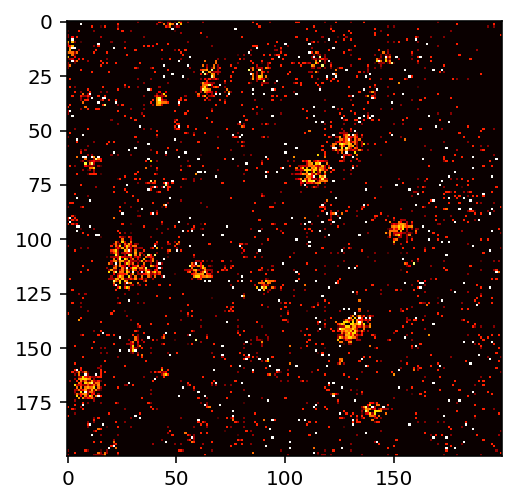

In [60]:
# Q4.1
# Display image
plt.imshow(imagedata)
plt.hot()


In [61]:
# Q4.1
imagedata

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12941177, 0.        , 0.        , ..., 0.15294118, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.2901961 ],
       [0.1764706 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

👆 Q4.1

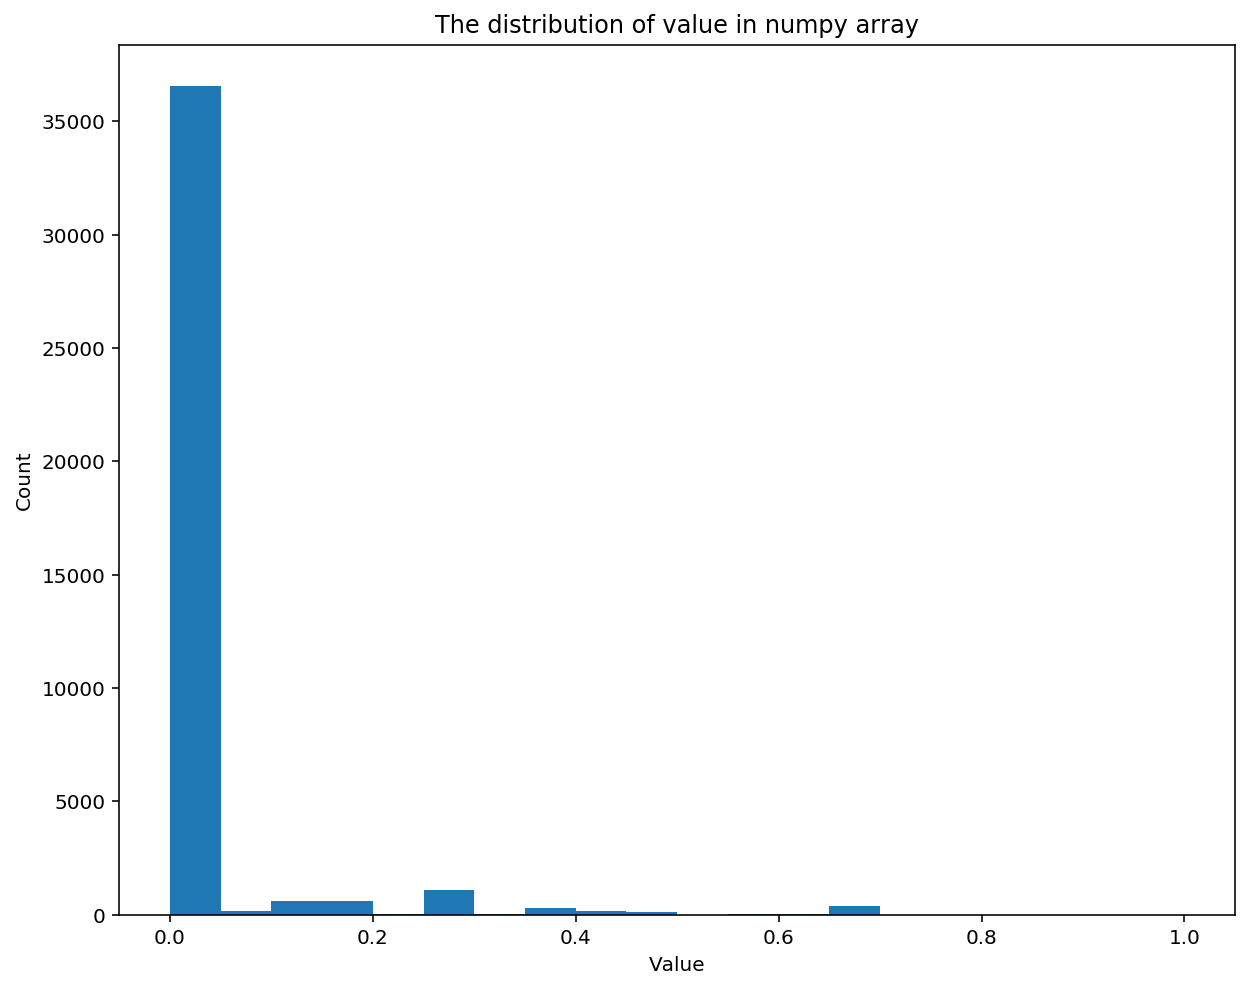

In [62]:
# Q4.2
%matplotlib inline
%config InlineBackend.figure_format ='retina'

plt.figure(figsize = (10,8))
plt.hist(imagedata.ravel(),20,[0,1])
plt.title('The distribution of value in numpy array')
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

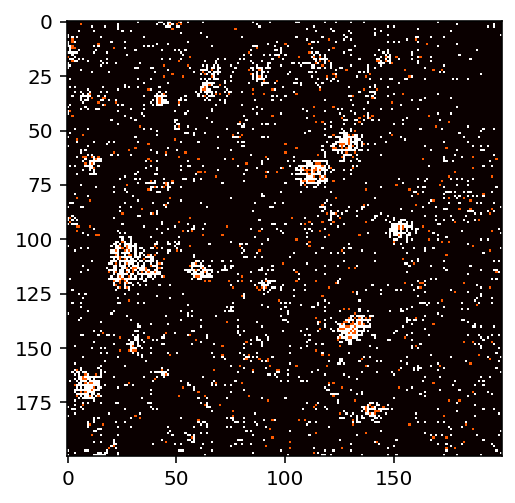

In [63]:
# Q4.3
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3,random_state=None).fit(imagedata.reshape(200*200,1))
clusteringdata = clustering.labels_.reshape(200,200)
plt.imshow(clusteringdata)
plt.hot()

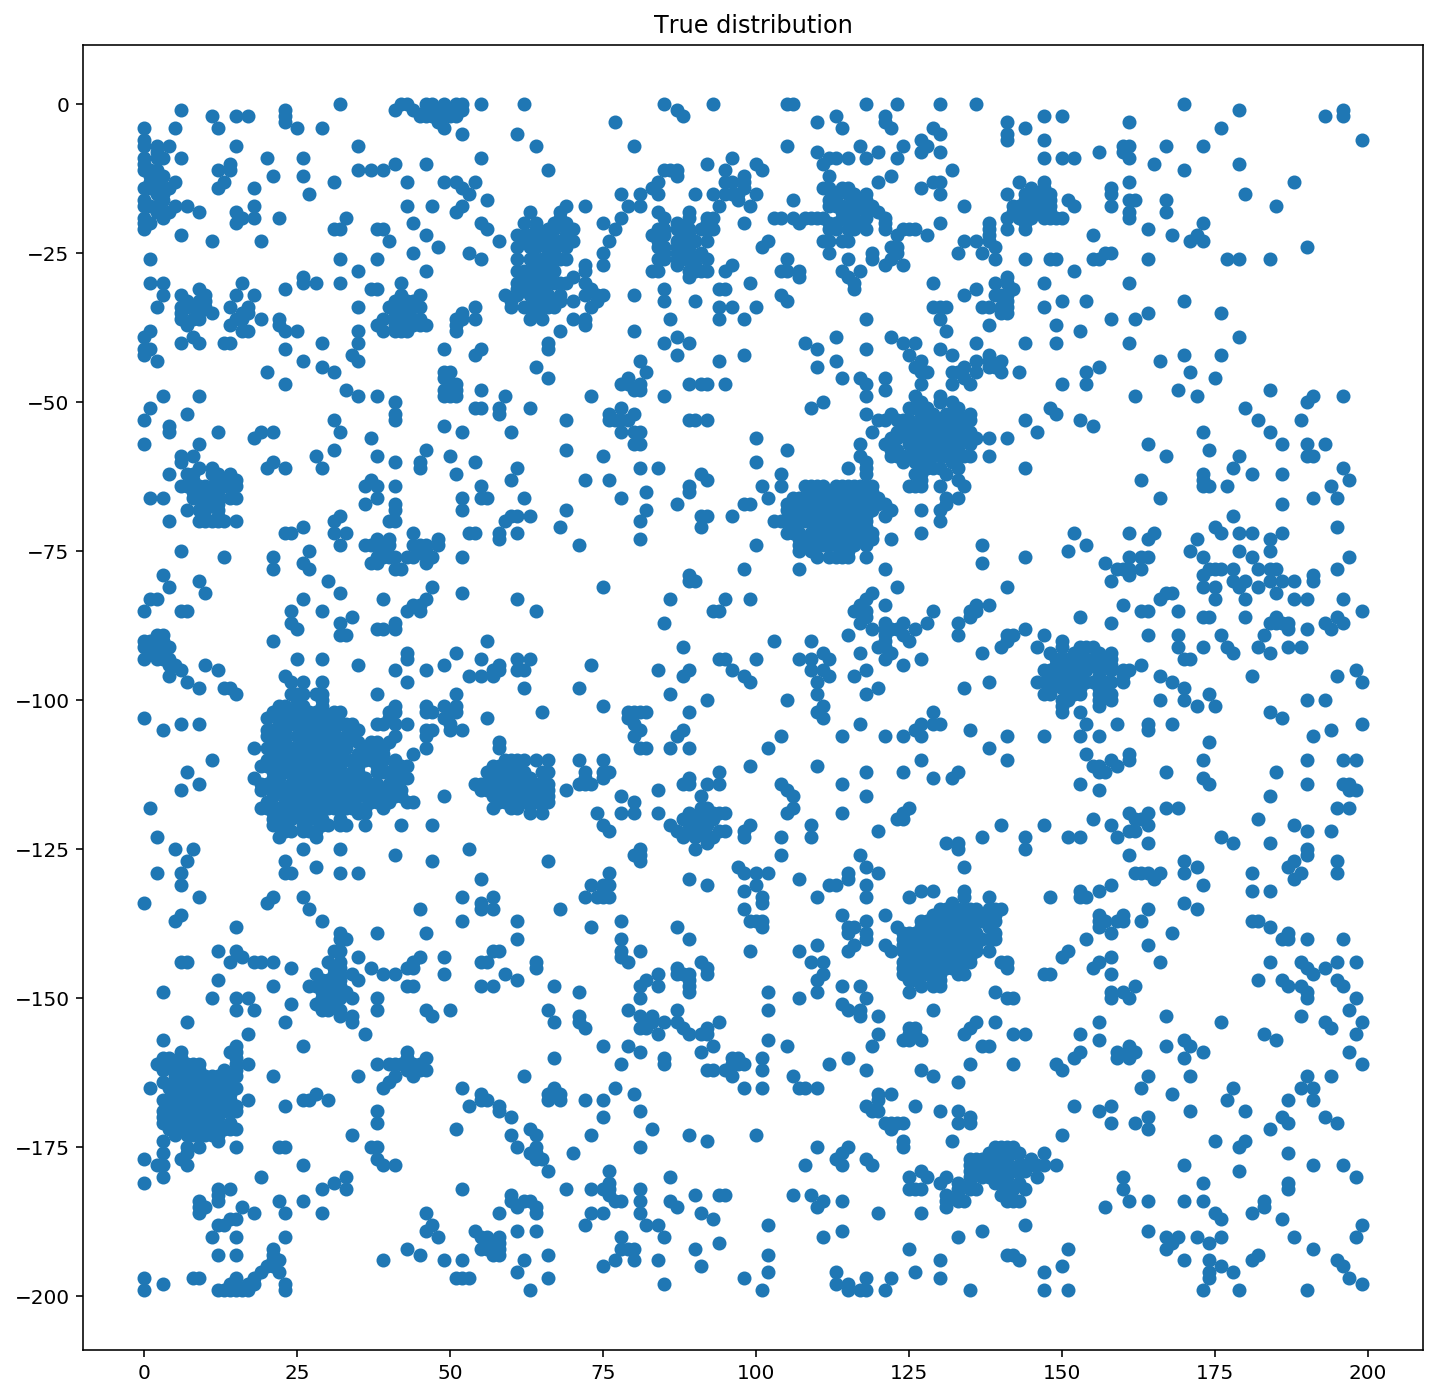

In [64]:
# Q4.4 Kmeans
coordinate_paticle = np.transpose(np.nonzero(imagedata))
coordinate_paticle[:, 0] = -coordinate_paticle[:, 0]
blist = np.copy(coordinate_paticle[:,0])
coordinate_paticle[:,0] = coordinate_paticle[:,1]
coordinate_paticle[:,1] = blist

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(coordinate_paticle[:, 0], coordinate_paticle[:, 1], cmap='Set1')
ax.set_title("True distribution")
plt.hot()


In [65]:
coordinate_paticle

array([[  32,    0],
       [  42,    0],
       [  43,    0],
       ...,
       [ 173, -199],
       [ 179, -199],
       [ 190, -199]])

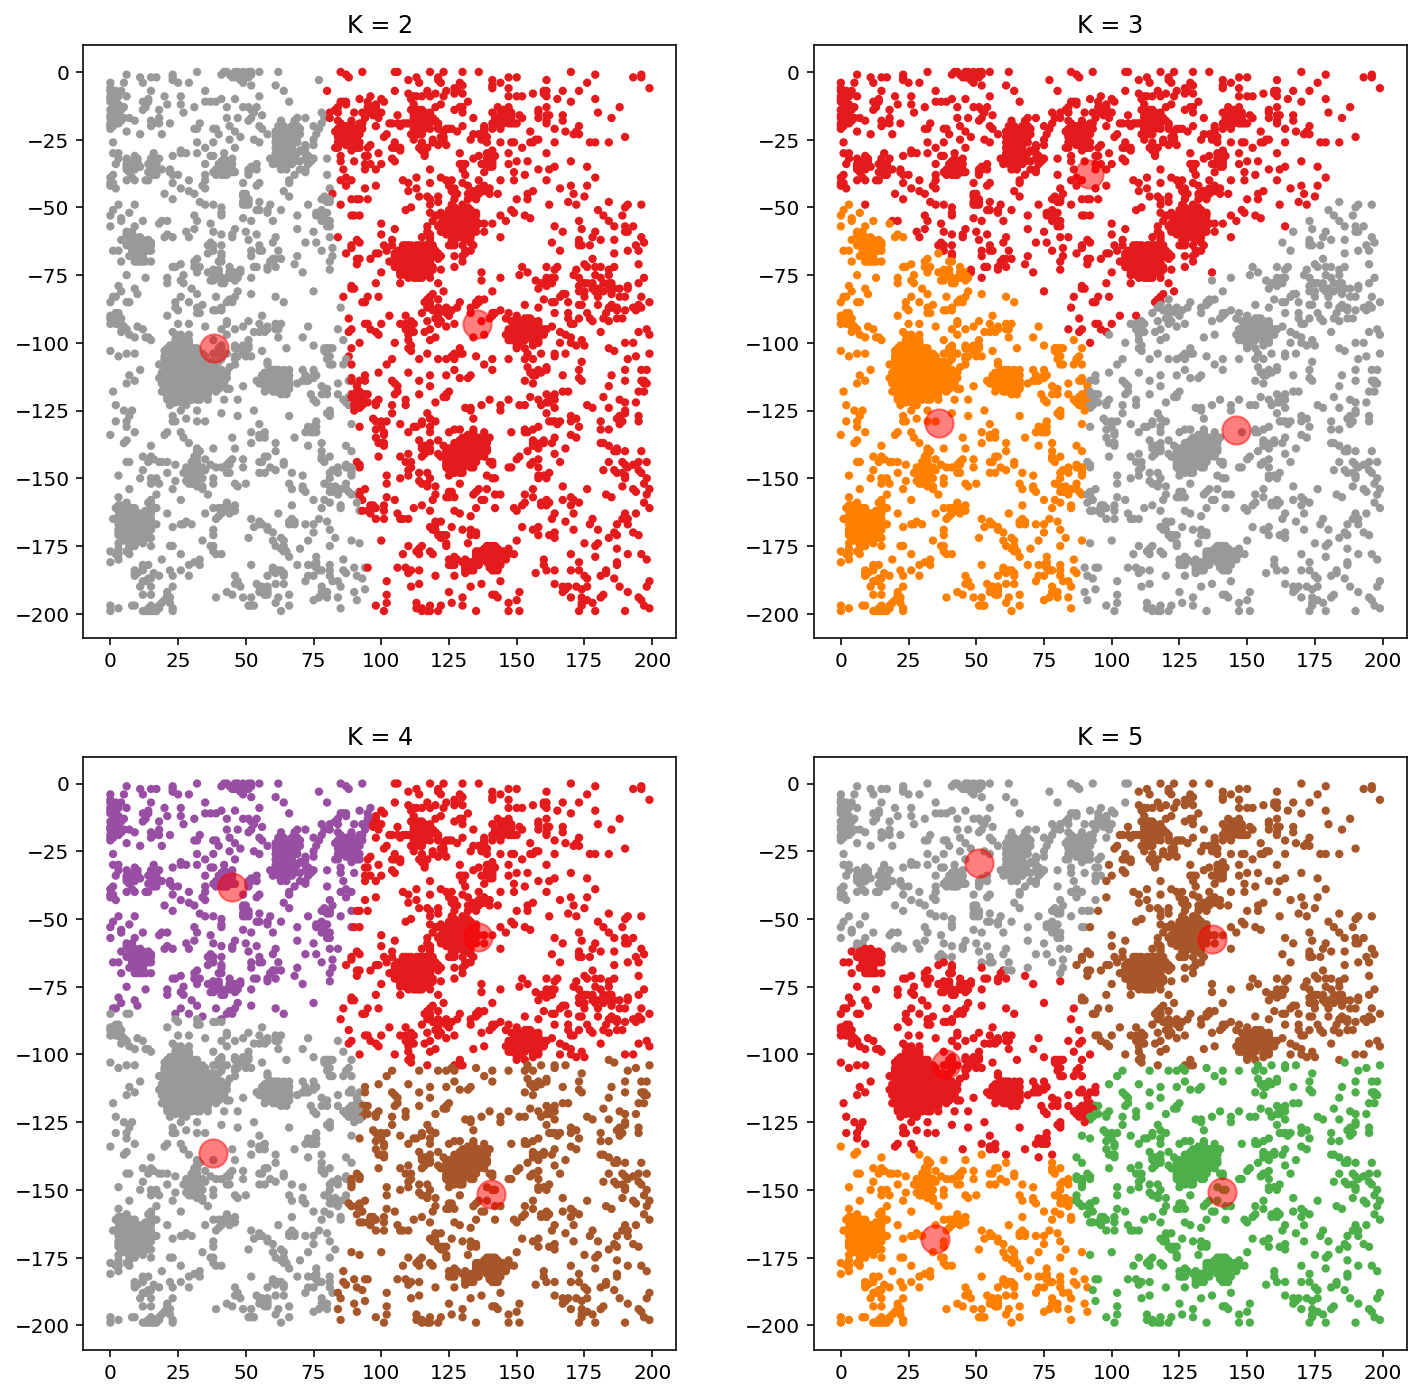

In [66]:
# Q4.4 Kmeans
# K = 2, 3, 4, 5,

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
cost =[]
for i, k in enumerate(range(2, 6)):
    particle_clustering = KMeans(n_clusters=k,random_state=None).fit(coordinate_paticle)
    a = ax[0 if i < 2 else 1 if i<4 else 2 if i<6 else 3 if i<8 else 4, i % 2]
    a.scatter(coordinate_paticle[:, 0], coordinate_paticle[:, 1], c=particle_clustering.labels_,s=10, cmap='Set1')
    a.scatter (particle_clustering.cluster_centers_[:,0], particle_clustering.cluster_centers_[:,1], s = 200, alpha = 0.5, c='r')
    cost.append(particle_clustering.inertia_)
    a.set_aspect('equal', 'box')
    a.set_title("K = %d" % k)

In [67]:
cost1 = cost

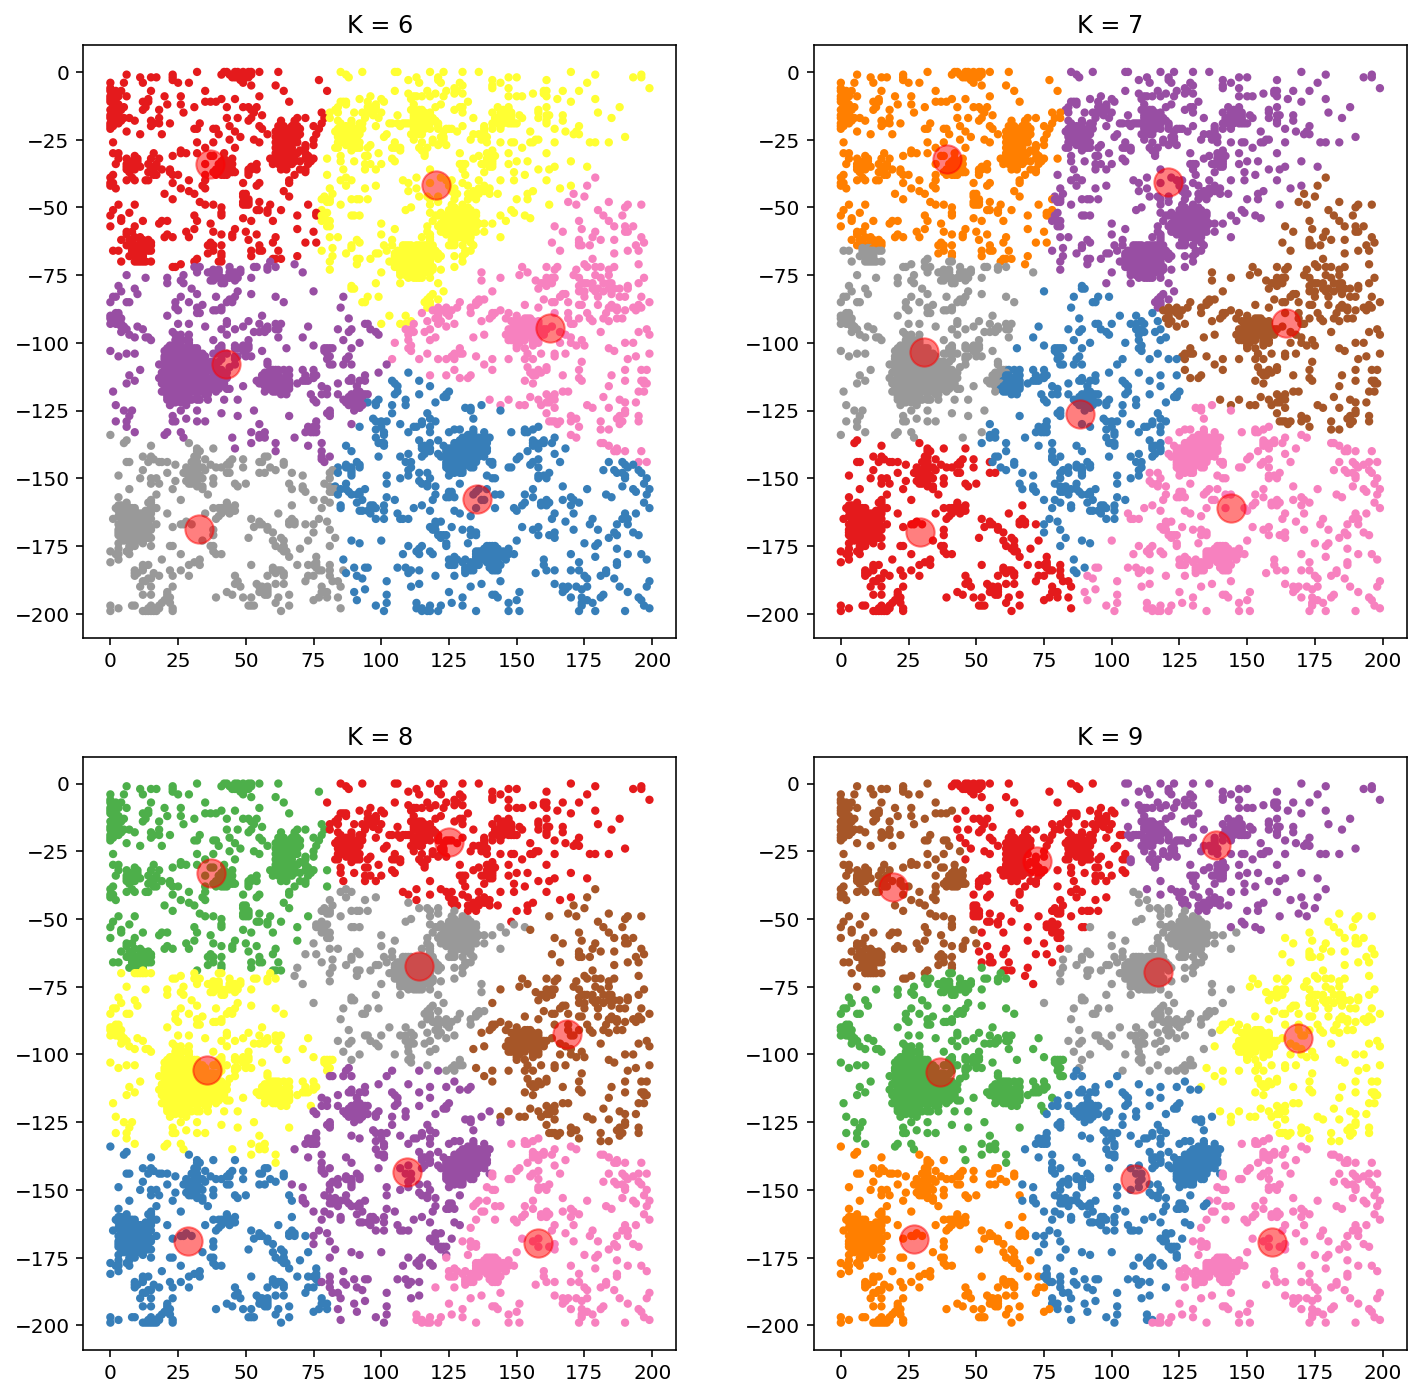

In [68]:
# Q4.4 Kmeans
# K = 5, 6, 7, 8,
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
cost1 = cost
for i, k in enumerate(range(6, 10)):
    particle_clustering = KMeans(n_clusters=k,random_state=None).fit(coordinate_paticle)
    a = ax[0 if i < 2 else 1 if i<4 else 2 if i<6 else 3 if i<8 else 4, i % 2]
    a.scatter(coordinate_paticle[:, 0], coordinate_paticle[:, 1], c=particle_clustering.labels_,s=10, cmap='Set1')
    a.scatter (particle_clustering.cluster_centers_[:,0], particle_clustering.cluster_centers_[:,1], s = 200, alpha = 0.5, c='r')
    cost.append(particle_clustering.inertia_)
    a.set_aspect('equal', 'box')
    a.set_title("K = %d" % k)

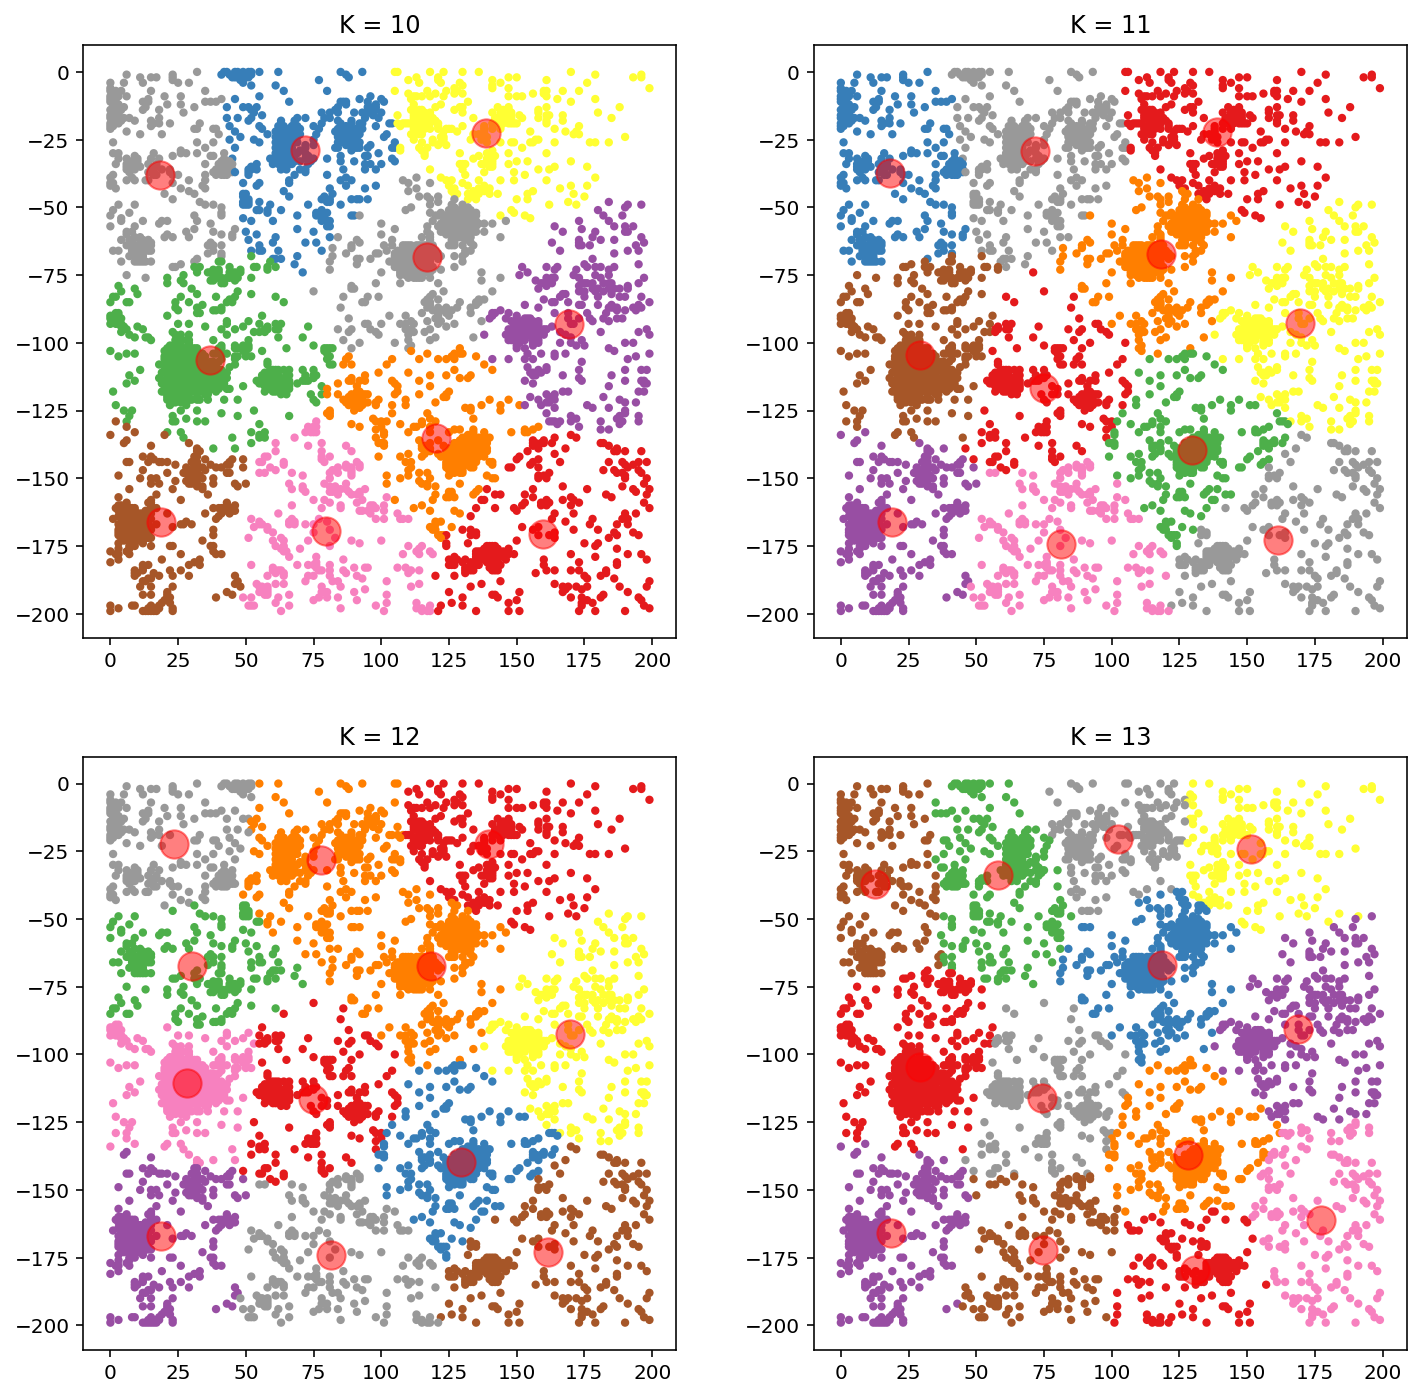

In [69]:
# Q4.4 Kmeans
# K = 9, 10, 11, 12,
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
cost2 =cost1
for i, k in enumerate(range(10, 14)):
    particle_clustering = KMeans(n_clusters=k,random_state=None).fit(coordinate_paticle)
    a = ax[0 if i < 2 else 1 if i<4 else 2 if i<6 else 3 if i<8 else 4, i % 2]
    a.scatter(coordinate_paticle[:, 0], coordinate_paticle[:, 1], c=particle_clustering.labels_, s=10,cmap='Set1')
    a.scatter (particle_clustering.cluster_centers_[:,0], particle_clustering.cluster_centers_[:,1], s = 200, alpha = 0.5, c='r')
    cost.append(particle_clustering.inertia_)
    a.set_aspect('equal', 'box')
    a.set_title("K = %d" % k)

In [70]:
cost

[12866878.973757487,
 7558969.823807718,
 5092132.757623654,
 4161896.263760498,
 3375181.878920096,
 2911193.3483971325,
 2496606.001359922,
 2138123.990288052,
 1882864.882064803,
 1677596.5574583353,
 1523754.8039101476,
 1398435.099580196]

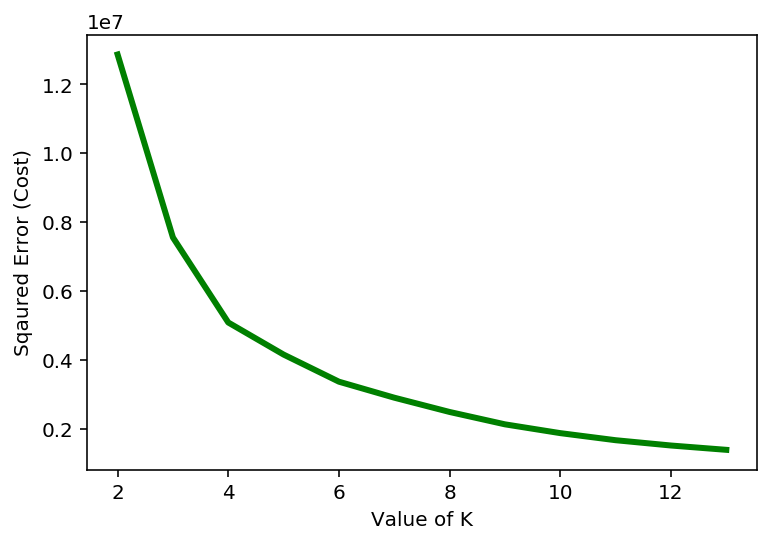

In [71]:
# Q4.4 Kmeans
# score the kmeans by '.inertia_' value

plt.plot(range(2, 14), cost2, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

👆 Q4.4 K=6
As we can see in the above pictures for K from 4 to 12.
1. when K<6, the data points are clustered roughly with no specific center cluster;
2. when K>6, some dispersive get their own center point, however they are not center cluster;
3. And we can see from the 'Sqaured Error (Cost)', star from K=6, the cost does not declines too much as the K increse.

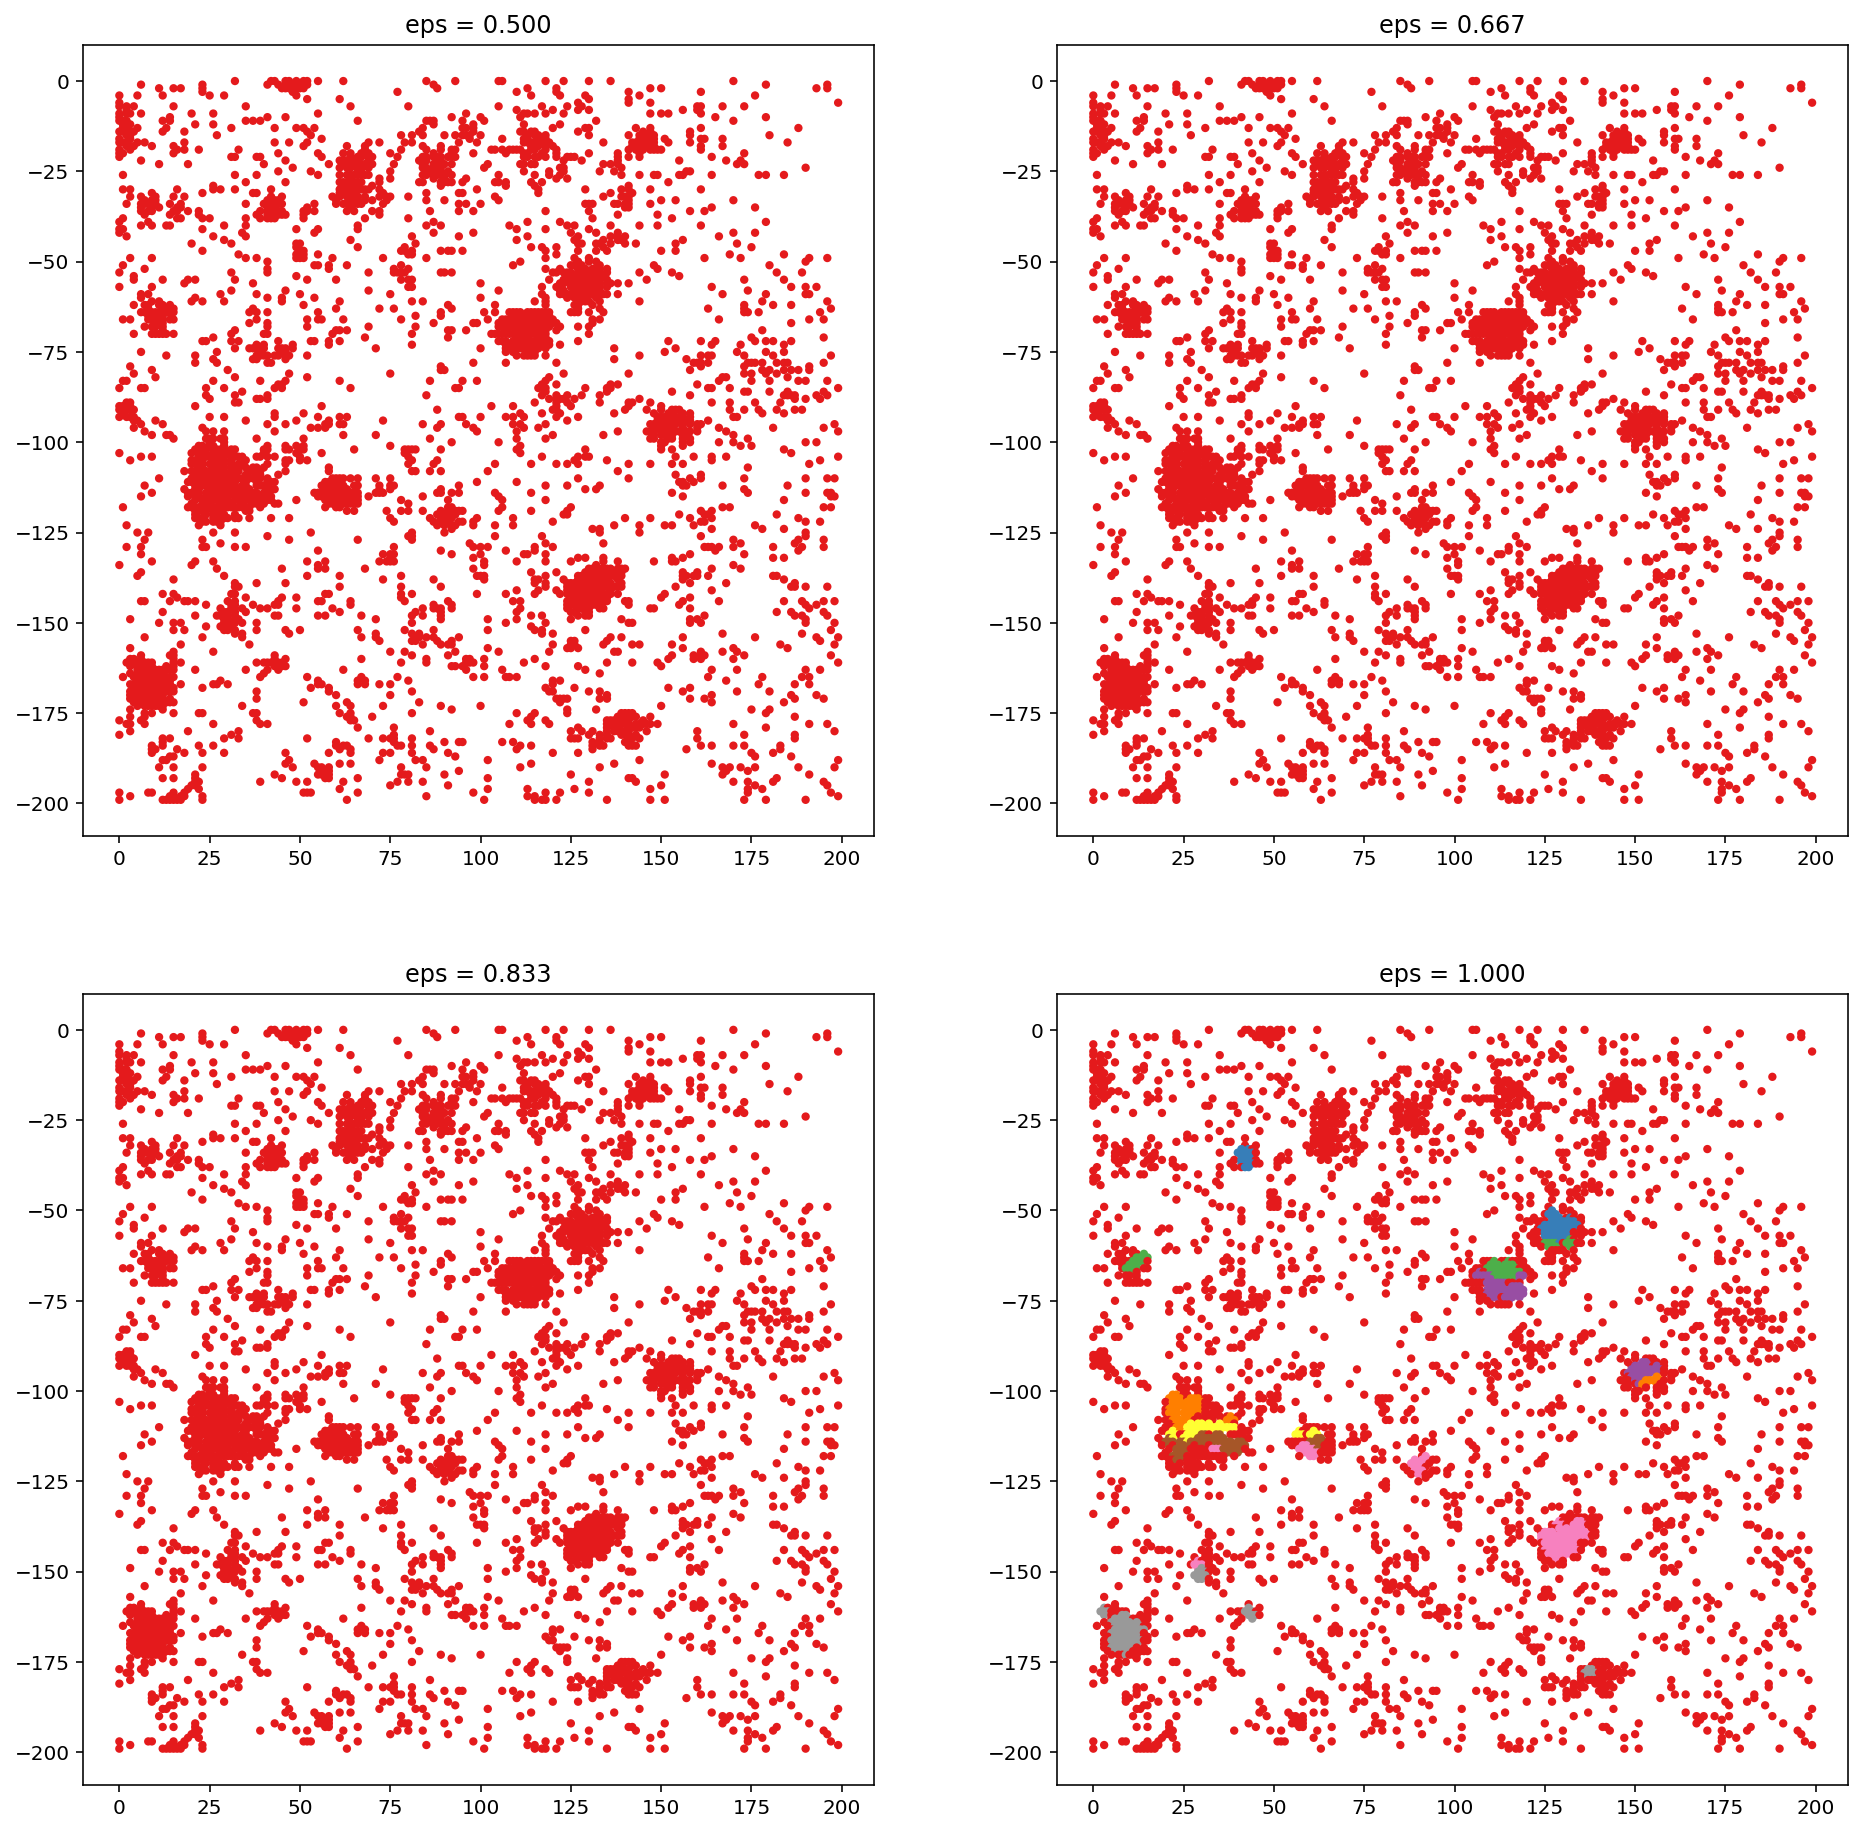

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score 

%matplotlib inline
%config InlineBackend.figure_format ='retina'
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
for i, eps in enumerate(np.linspace(0.5, 1, 4)):
    clustering = DBSCAN(eps=eps).fit(coordinate_paticle)
    a = ax[0 if i < 2 else 1 if i<4 else 2 if i<6 else 3 if i<8 else 4, i % 2]
    a.scatter(coordinate_paticle[:, 0], coordinate_paticle[:, 1], c=clustering.labels_, s=10,cmap='Set1')
    a.set_aspect('equal', 'box')
    a.set_title("eps = %.3f" % eps)

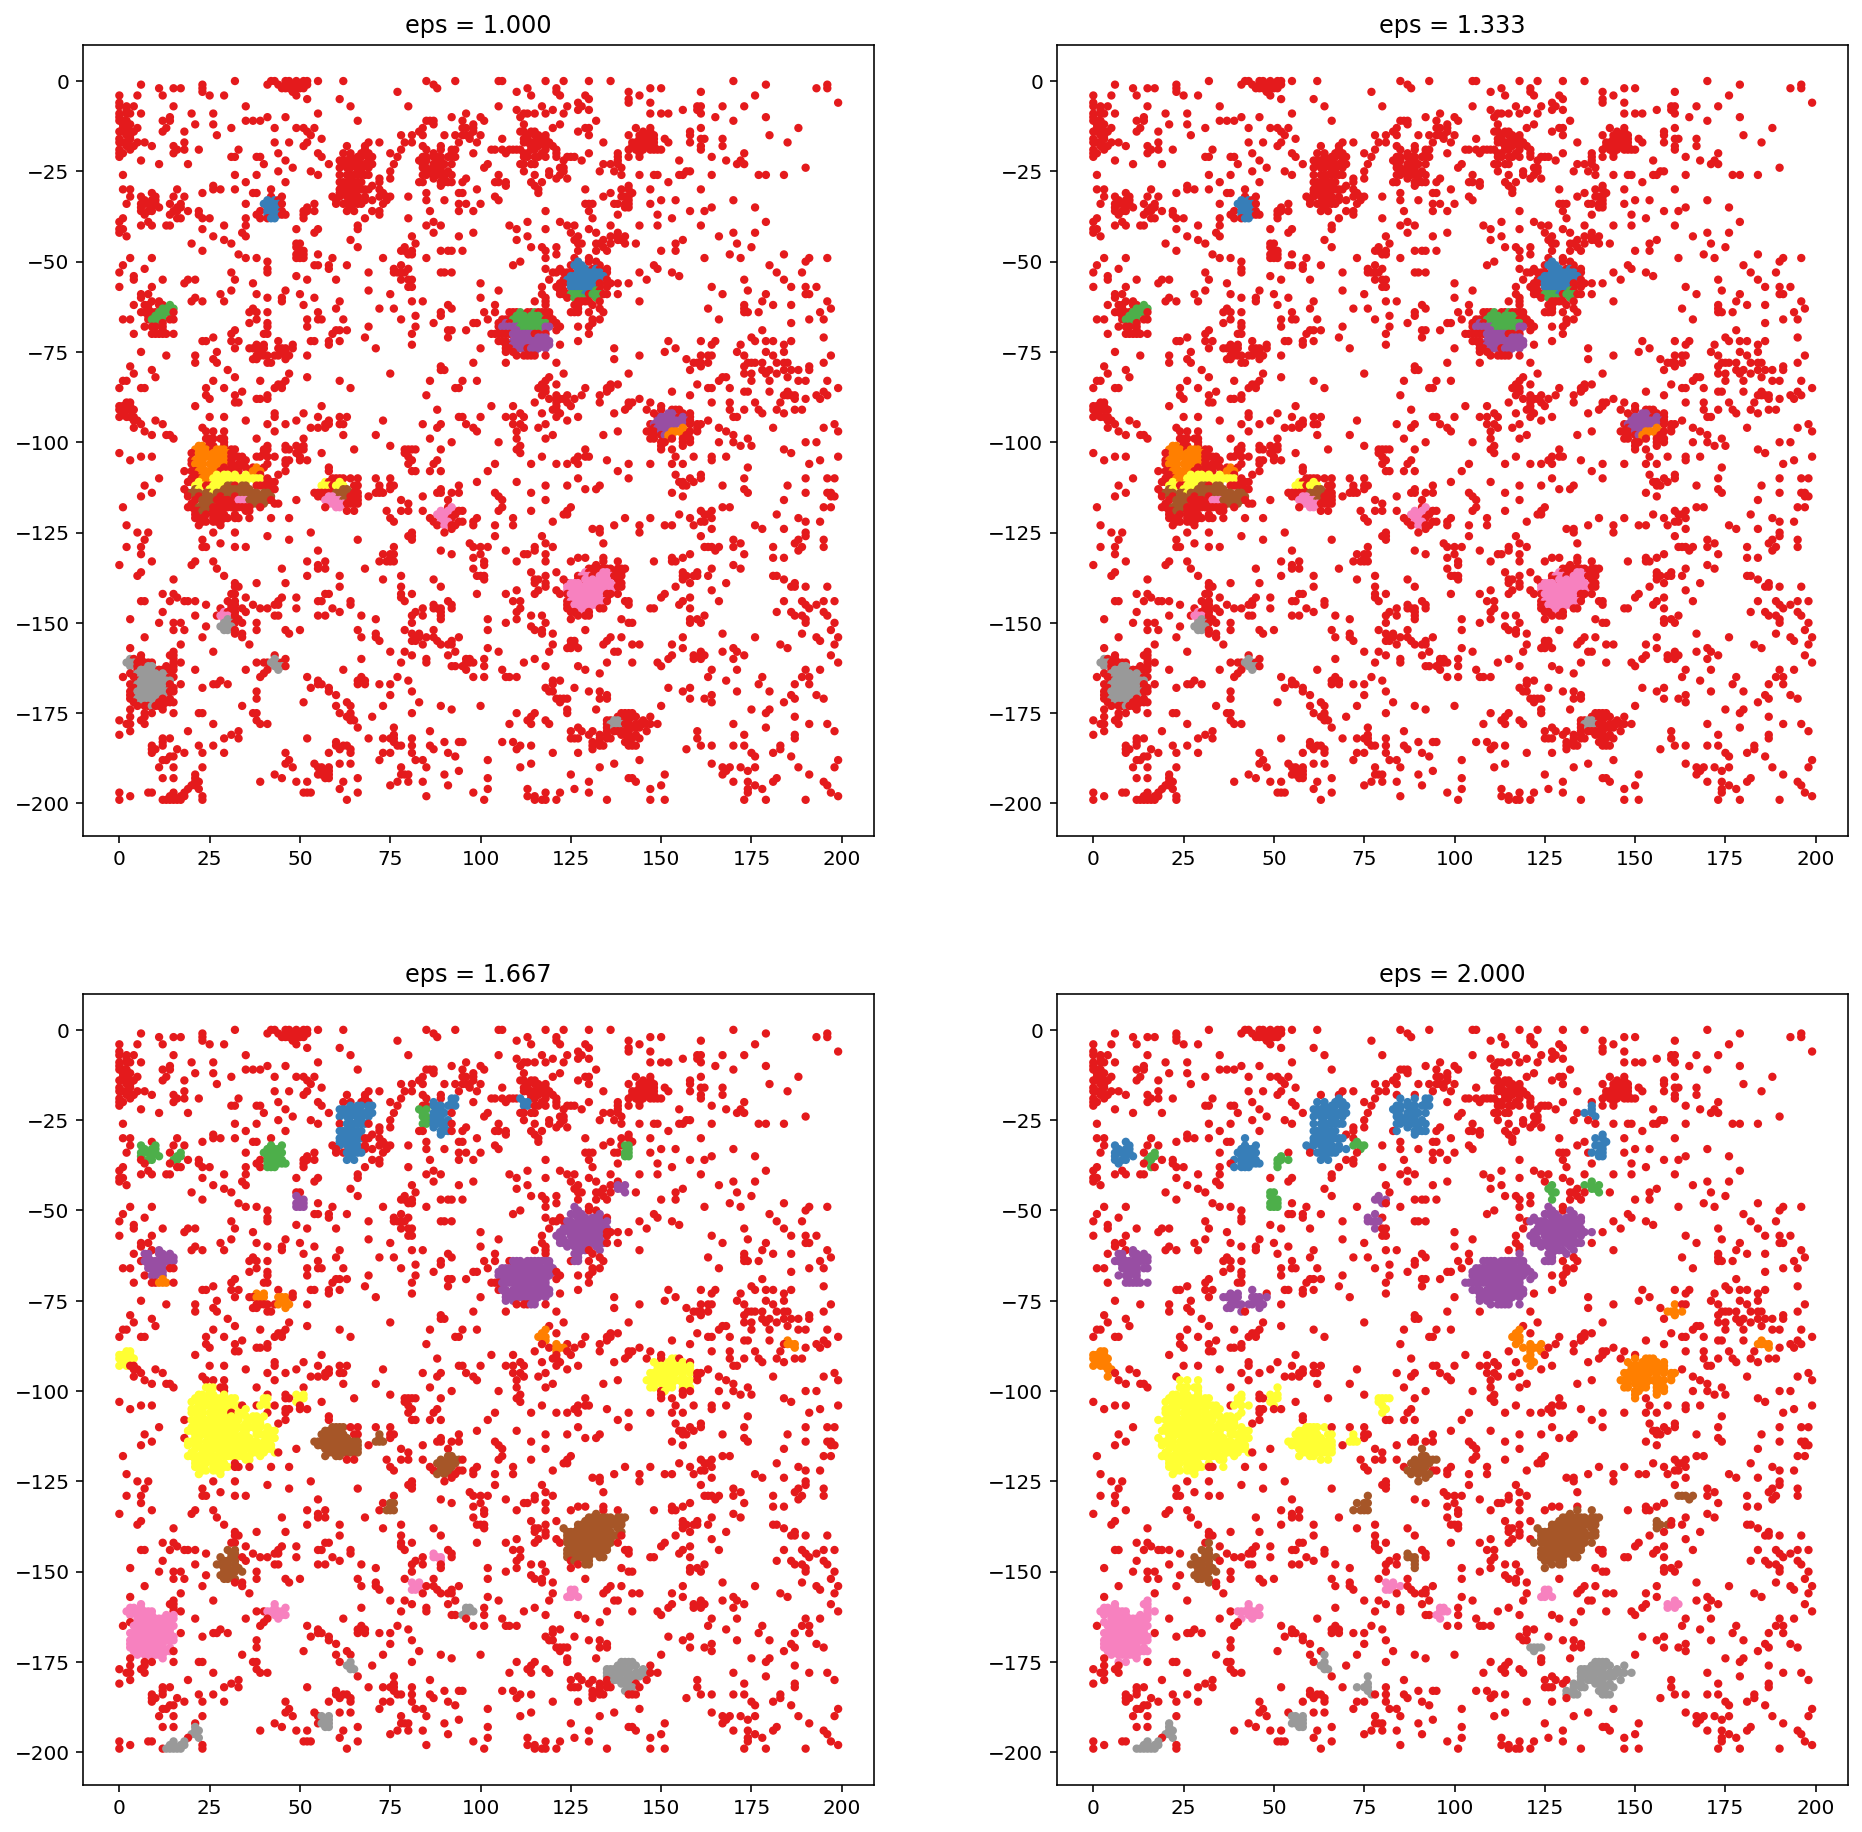

In [73]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

for i, eps in enumerate(np.linspace(1, 2, 4)):
    clustering = DBSCAN(eps=eps).fit(coordinate_paticle)
    a = ax[0 if i < 2 else 1 if i<4 else 2 if i<6 else 3 if i<8 else 4, i % 2]
    a.scatter(coordinate_paticle[:, 0], coordinate_paticle[:, 1], c=clustering.labels_, s=10,cmap='Set1')
    a.set_aspect('equal', 'box')
    a.set_title("eps = %.3f" % eps)

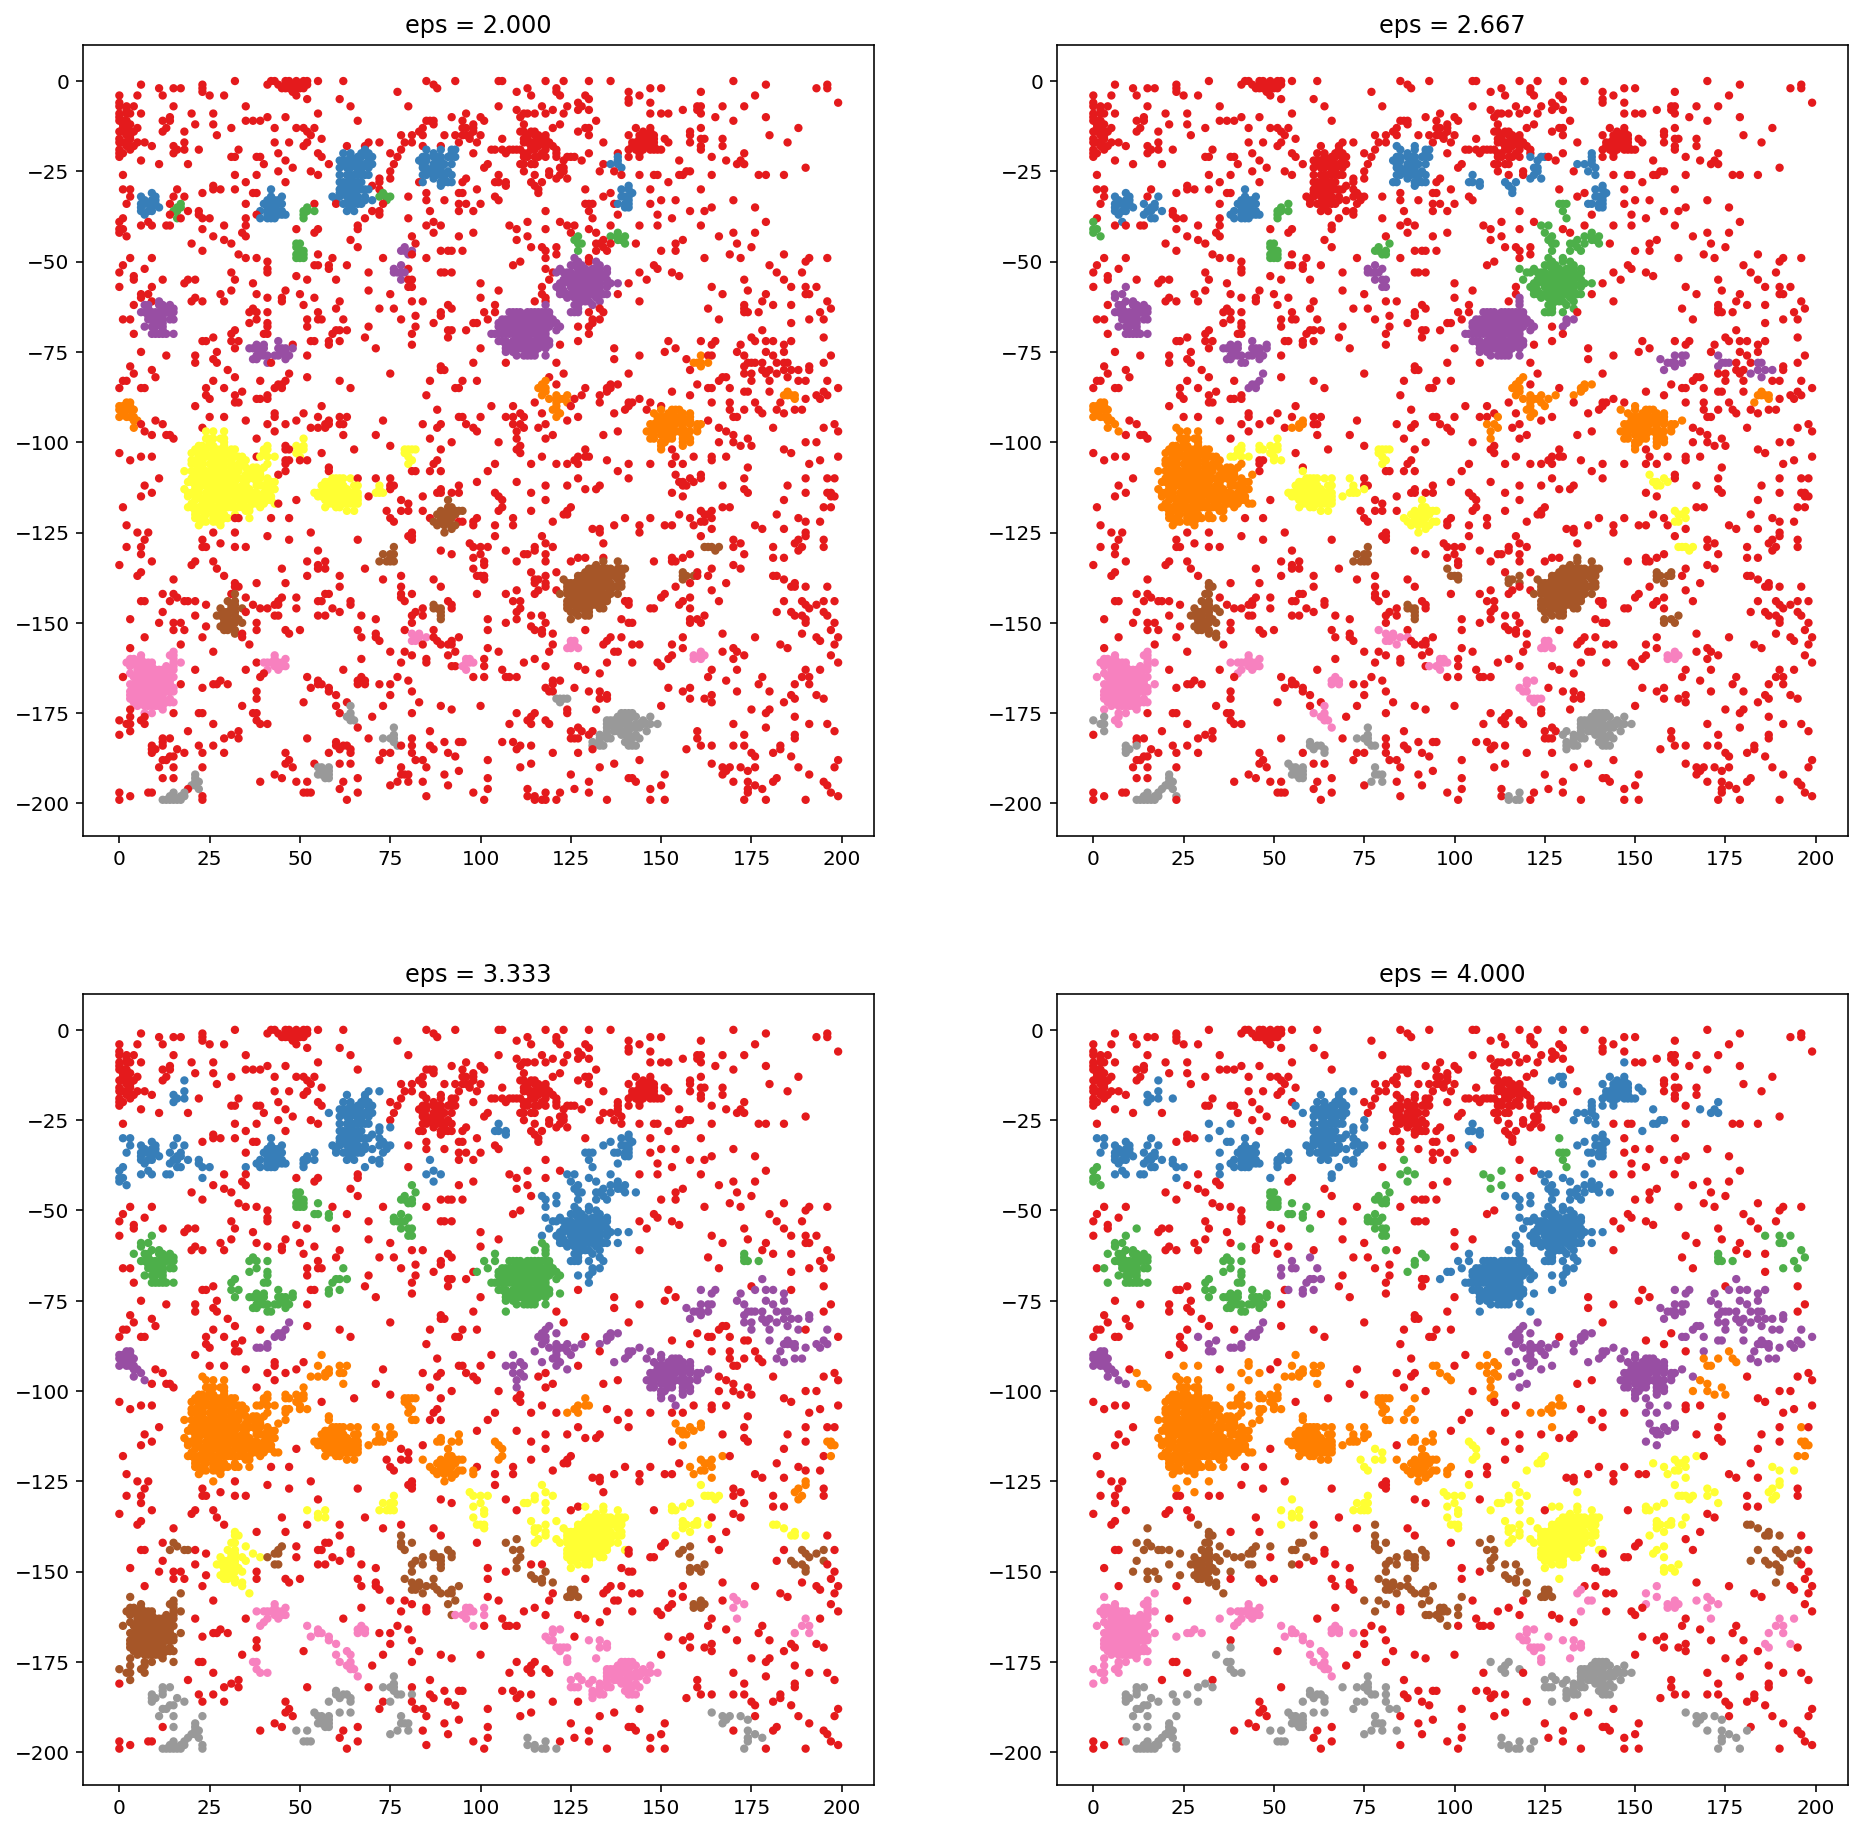

In [74]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

for i, eps in enumerate(np.linspace(2, 4, 4)):
    clustering = DBSCAN(eps=eps).fit(coordinate_paticle)
    a = ax[0 if i < 2 else 1 if i<4 else 2 if i<6 else 3 if i<8 else 4, i % 2]
    a.scatter(coordinate_paticle[:, 0], coordinate_paticle[:, 1], c=clustering.labels_, s=10,cmap='Set1')
    a.set_aspect('equal', 'box')
    a.set_title("eps = %.3f" % eps)

# 👆 Q4.5 eps=[1.667, 2] 
If the eps is too small(less than 1), all elements can not form a cluster since the distances among points are larger than the threshold;
Also if the spe is larger, bigger but less clustes will form, and some scatters in different places will form clusters respectively. In the end, all elements can form one and only one cluster.
In this case, the eps between [1.667, 2]  are better

Q 4.5
K-means is a centroid based clustering algorithm, while DBScan is a density-based clustering algprithm.
Because the values of the points in this question are ignores. Then this question is equal to find the clusters in the points set. **Thus, the DBScan is better since you do not know how many clusters in total(which need to be known as K in K-means methods)**. And as for the K-means, it will take all the points into the cluster. In this case, some scatters are forced into new clusters which is wrong for the catalyst cluster.